# **1. Import Tools**

> Add blockquote



In [ ]:
import pandas as pd
import numpy as np
import gdown
from datetime import datetime

In [ ]:
url = 'https://drive.google.com/file/d/1XWbRb5j-qvuaj3rpfhahIE0YojWfYANl/view?usp=sharing'
output = 'card_data.csv'

url_user = 'https://drive.google.com/file/d/1_xFUfSyvA3jgTBELM38KYo-7H2AIEO6y/view?usp=sharing'
output_user = 'user_data.csv'

gdown.download(url, output, quiet=False, fuzzy=True)
gdown.download(url_user, output_user, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1XWbRb5j-qvuaj3rpfhahIE0YojWfYANl
To: /content/card_data.csv
100%|██████████| 513k/513k [00:00<00:00, 50.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_xFUfSyvA3jgTBELM38KYo-7H2AIEO6y
To: /content/user_data.csv
100%|██████████| 133k/133k [00:00<00:00, 60.7MB/s]


'user_data.csv'

In [ ]:
df_card = pd.read_csv('/content/card_data.csv')
df_user = pd.read_csv('/content/user_data.csv')

# **2. Cleaning Card Data**

## **a. Identifying Dirty Data**

### - Checking format and data types

In [ ]:
df_card

id  client_id  card_brand       card_number  expires  cvv  \
0        0       1362        Amex   393314135668401  04/2030  866   
1        1        550  Mastercard  5278231764792292  06/2030  396   
2        2        556  Mastercard  5889825928297675  09/2027  422   
3        3       1937        Visa  4289888672554714  04/2026  736   
4        4       1981  Mastercard  5433366978583845  03/2030  530   
...    ...        ...         ...               ...      ...  ...   
5594  4508       1190       Visa   4227482000380763  07/2028  795   
5595   209       1334       Visa   4144931322114018  02/2029  312   
5596  2711        185       Visa   4718517475996018  01/2027  492   
5597  1161       1891       Visa   4268017872699469  08/2031  476   
5598  6115        921       Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0     Rp53.189.000        01/1996                   2019                   17   
1     Rp18.200.000        01/1999                   2018                   27   
2     Rp31.298.000        01/2000                   2016                   20   
3     Rp25.732.000        01/2000                   2020                    7   
4     Rp30.500.000        01/2002                   2012                   14   
...            ...            ...                    ...                  ...   
5594   Rp7.301.000        09/2005                   2012                    5   
5595  Rp14.592.000        01/2014                   2014                   32   
5596   Rp8.943.000        04/2017                   2017                   14   
5597  Rp23.891.000        02/2013                   2020                   12   
5598  Rp35.623.000        12/2020                   2020                   15   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                     181.00        Rp177.057.300                  NaN   
1                     148.00        Rp135.687.100                  NaN   
2                     415.00        Rp186.723.300                  NaN   
3                     148.00        Rp207.881.500                  NaN   
4                      48.00         Rp28.007.500                  NaN   
...                      ...                  ...                  ...   
5594                  320.00        Rp196.255.900                  NaN   
5595                   41.00         Rp51.009.700                  NaN   
5596                  198.00         Rp89.850.000                  NaN   
5597                   96.00         Rp43.768.500                  NaN   
5598                   39.00         Rp53.889.900                  NaN   

     amt_fraud_trx_L6M  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
5594               NaN  
5595               NaN  
5596               NaN  
5597               NaN  
5598               NaN  

[5599 rows x 14 columns]

In [ ]:
 df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5599 non-null   int64  
 1   client_id               5599 non-null   int64  
 2   card_brand              5599 non-null   object 
 3   card_number             5599 non-null   int64  
 4   expires                 5599 non-null   object 
 5   cvv                     5599 non-null   int64  
 6   credit_limit            5587 non-null   object 
 7   acct_open_date          5599 non-null   object 
 8   year_pin_last_changed   5599 non-null   int64  
 9   days_since_last_trx     5599 non-null   int64  
 10  count_nonfraud_trx_L6M  3707 non-null   float64
 11  amt_nonfraud_trx_L6M    3707 non-null   object 
 12  count_fraud_trx_L6M     547 non-null    float64
 13  amt_fraud_trx_L6M       547 non-null    object 
dtypes: float64(2), int64(6), object(6)
memor

### - Checking typos

In [ ]:
df_card['card_brand'].value_counts()

card_brand
Mastercard    2826
Visa          2093
Amex           402
JCB            206
Visa            69
Jcb              3
Name: count, dtype: int64

### - Checking missing value and duplicates

In [ ]:
df_card[df_card['amt_nonfraud_trx_L6M'].isna()]

id  client_id  card_brand       card_number  expires  cvv  \
6        6       1046        Amex   394584924614148  11/2026  302   
7        7        511  Mastercard  5585238056278288  08/2029  749   
18      18         11  Mastercard  5919854740342964  05/2029  604   
22      23        318        Visa  4234128216675939  08/2028  678   
24      25        528        Visa  4287552229905456  03/2027  482   
...    ...        ...         ...               ...      ...  ...   
5582   749         54       Visa   4557061225558443  05/2029  780   
5584  1781       1372       Visa   4806267788873524  08/2026  289   
5585  1915       1933       Visa   4146946026841288  02/2026   69   
5589  1964       1126       Visa   4224143942174854  03/2028    4   
5593  5296       1178       Visa   4410685608952637  06/2030  265   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
6     Rp14.749.000        02/1999                   2016                  604   
7     Rp15.163.000        01/2003                   2016                  604   
18    Rp28.713.000        11/2004                   2016                  604   
22    Rp11.768.000        01/2006                   2022                  604   
24    Rp11.030.000        04/2003                   2016                  604   
...            ...            ...                    ...                  ...   
5582  Rp22.300.000        05/2023                   2025                  604   
5584   Rp9.257.000        08/2020                   2025                  604   
5585   Rp3.285.000        02/2020                   2025                  604   
5589  Rp31.879.000        03/2022                   2025                  604   
5593  Rp27.214.000        10/2019                   2019                  604   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
6                        NaN                  NaN                  NaN   
7                        NaN                  NaN                  NaN   
18                       NaN                  NaN                  NaN   
22                       NaN                  NaN                  NaN   
24                       NaN                  NaN                  NaN   
...                      ...                  ...                  ...   
5582                     NaN                  NaN                  NaN   
5584                     NaN                  NaN                  NaN   
5585                     NaN                  NaN                  NaN   
5589                     NaN                  NaN                  NaN   
5593                     NaN                  NaN                  NaN   

     amt_fraud_trx_L6M  
6                  NaN  
7                  NaN  
18                 NaN  
22                 NaN  
24                 NaN  
...                ...  
5582               NaN  
5584               NaN  
5585               NaN  
5589               NaN  
5593               NaN  

[1892 rows x 14 columns]

In [ ]:
df_card.isna().sum()

id                           0
client_id                    0
card_brand                   0
card_number                  0
expires                      0
cvv                          0
credit_limit                12
acct_open_date               0
year_pin_last_changed        0
days_since_last_trx          0
count_nonfraud_trx_L6M    1892
amt_nonfraud_trx_L6M      1892
count_fraud_trx_L6M       5052
amt_fraud_trx_L6M         5052
dtype: int64

In [ ]:
df_card[df_card['credit_limit'].isna()]

id  client_id  card_brand       card_number  expires  cvv  \
696    782       1658        Visa  4351530526237151  02/2024  164   
2309  2559        165  Mastercard  5283475217390040  08/2016  149   
2744  3033       1614        Visa  4605207086612818  05/2024  438   
3291  3626        870        Amex   349088998842560  04/2024  652   
3756  4137       1348  Mastercard  5792498646569711  03/2024  554   
3915  4318        668  Mastercard  5764603958082866  07/2022  397   
3929  4334       1514  Mastercard  5052545011580809  06/2022  940   
4142  4564        274        Visa  4636302289774996  09/2020  898   
4180  4610       1306  Mastercard  5600916670945192  04/2025  252   
4877  5389        373  Mastercard  5435311573918660  02/2023   45   
5136  5680        214        Visa  4159886669620519  09/2023  693   
5228  5781       1942  Mastercard  5622083190963613  10/2024  770   

     credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
696           NaN        02/2018                   2025                  604   
2309          NaN        08/2010                   2019                  604   
2744          NaN        05/2014                   2014                  604   
3291          NaN        04/2018                   2023                  400   
3756          NaN        08/2009                   2014                  604   
3915          NaN        08/2015                   2015                  604   
3929          NaN        08/2015                   2015                  604   
4142          NaN        09/2009                   2015                  604   
4180          NaN        09/2011                   2015                  604   
4877          NaN        11/2008                   2017                  604   
5136          NaN        11/2017                   2017                  604   
5228          NaN        12/2007                   2014                  434   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
696                      NaN                  NaN                  NaN   
2309                     NaN                  NaN                  NaN   
2744                     NaN                  NaN                  NaN   
3291                     NaN                  NaN                  NaN   
3756                     NaN                  NaN                  NaN   
3915                     NaN                  NaN                  NaN   
3929                     NaN                  NaN                  NaN   
4142                     NaN                  NaN                  NaN   
4180                     NaN                  NaN                  NaN   
4877                     NaN                  NaN                  NaN   
5136                     NaN                  NaN                  NaN   
5228                     NaN                  NaN                  NaN   

     amt_fraud_trx_L6M  
696                NaN  
2309               NaN  
2744               NaN  
3291               NaN  
3756               NaN  
3915               NaN  
3929               NaN  
4142               NaN  
4180               NaN  
4877               NaN  
5136               NaN  
5228               NaN

In [ ]:
df_card[df_card['credit_limit'] == 'Rp0'].count()

id                        25
client_id                 25
card_brand                25
card_number               25
expires                   25
cvv                       25
credit_limit              25
acct_open_date            25
year_pin_last_changed     25
days_since_last_trx       25
count_nonfraud_trx_L6M     1
amt_nonfraud_trx_L6M       1
count_fraud_trx_L6M        0
amt_fraud_trx_L6M          0
dtype: int64

In [ ]:
df_card.duplicated().sum()

np.int64(0)

In [ ]:
df_card[df_card['card_number'].duplicated()] # checking duplicates in card_number

id  client_id card_brand       card_number  expires  cvv  \
5568  2347        601      Visa   4000370059012165  11/2030   22   
5569  2720         73      Visa   4782359944930749  06/2030   12   
5570  2893       1759      Visa   4174613161615032  10/2030  977   
5571  5353       1561      Visa   4243596342751426  07/2028  687   
5572  4350       1123      Visa   4292936340098046  02/2029  106   
5573  3456         48      Visa   4456924264973452  03/2030  483   
5574  5515       1422      Visa   4103248264872952  07/2031   23   
5575  4867        157      Visa   4884544538827906  07/2027  296   
5576  4972       1308      Visa   4900994567069763  07/2027   24   
5577  1981        136      Visa   4270247503047583  08/2029  977   
5578    24       1274      Visa   4181524038316536  04/2027    2   
5579  5470        460      Visa   4858755901764608  10/2026  766   
5580  1860        975      Visa   4039295566770817  05/2027  214   
5581   374       1115      Visa   4906405312400640  02/2029  579   
5582   749         54      Visa   4557061225558443  05/2029  780   
5583  4167       1875      Visa   4557993037807765  06/2030  133   
5584  1781       1372      Visa   4806267788873524  08/2026  289   
5585  1915       1933      Visa   4146946026841288  02/2026   69   
5586  3080       1969      Visa   4288810793226677  03/2027  453   
5587  2352       1509      Visa   4417739183409950  01/2029  990   
5588  2437         40      Visa   4299508349741779  09/2027  579   
5589  1964       1126      Visa   4224143942174854  03/2028    4   
5590  5393        154      Visa   4900806445604257  01/2030   23   
5591    20       1728      Visa   4665365862082531  06/2027  412   
5592  3875        699      Visa   4029109059179282  08/2030  637   
5593  5296       1178      Visa   4410685608952637  06/2030  265   
5594  4508       1190      Visa   4227482000380763  07/2028  795   
5595   209       1334      Visa   4144931322114018  02/2029  312   
5596  2711        185      Visa   4718517475996018  01/2027  492   
5597  1161       1891      Visa   4268017872699469  08/2031  476   
5598  6115        921      Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
5568   Rp8.473.000        03/2020                   2020                   29   
5569  Rp27.068.000        04/2018                   2018                    7   
5570  Rp17.259.000        05/2010                   2025                   19   
5571   Rp4.271.000        11/2002                   2021                    4   
5572   Rp2.187.000        08/2015                   2020                    4   
5573  Rp15.845.000        06/2014                   2018                    8   
5574  Rp10.184.000        11/2012                   2018                    3   
5575  Rp21.084.000        01/2015                   2018                    9   
5576  Rp23.221.000        10/2007                   2017                  604   
5577  Rp38.605.000        08/2023                   2025                  604   
5578  Rp23.786.000        01/2006                   2012                    4   
5579  Rp13.286.000        11/2011                   2015                   27   
5580  Rp11.336.000        05/2021                   2025                  604   
5581  Rp15.566.000        01/2023                   2023                   36   
5582  Rp22.300.000        05/2023                   2025                  604   
5583  Rp25.992.000        08/2010                   2014                    3   
5584   Rp9.257.000        08/2020                   2025                  604   
5585   Rp3.285.000        02/2020                   2025                  604   
5586   Rp4.732.000        05/2015                   2016                    8   
5587  Rp28.459.000        03/2020                   2020                    2   
5588   Rp2.294.000        04/2007                   2018                   23   
5589  Rp31.879.000        03/2022                

In [ ]:
df_card[df_card['card_number'].duplicated(keep=False)] # checking along with the duplicates

id  client_id card_brand       card_number  expires  cvv  \
20      20       1728       Visa  4665365862082531  06/2027  412   
23      24       1274       Visa  4181524038316536  04/2027    2   
191    209       1334       Visa  4144931322114018  02/2029  312   
340    374       1115       Visa  4906405312400640  02/2029  579   
667    749         54       Visa  4557061225558443  05/2029  780   
...    ...        ...        ...               ...      ...  ...   
5594  4508       1190      Visa   4227482000380763  07/2028  795   
5595   209       1334      Visa   4144931322114018  02/2029  312   
5596  2711        185      Visa   4718517475996018  01/2027  492   
5597  1161       1891      Visa   4268017872699469  08/2031  476   
5598  6115        921      Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
20     Rp5.962.000        01/2006                   2008                   25   
23    Rp23.786.000        01/2006                   2012                    4   
191   Rp14.592.000        01/2014                   2014                   32   
340   Rp15.566.000        01/2023                   2023                   36   
667   Rp22.300.000        05/2023                   2025                  604   
...            ...            ...                    ...                  ...   
5594   Rp7.301.000        09/2005                   2012                    5   
5595  Rp14.592.000        01/2014                   2014                   32   
5596   Rp8.943.000        04/2017                   2017                   14   
5597  Rp23.891.000        02/2013                   2020                   12   
5598  Rp35.623.000        12/2020                   2020                   15   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
20                     56.00         Rp72.816.000                  NaN   
23                    251.00        Rp217.885.900                  NaN   
191                    41.00         Rp51.009.700                  NaN   
340                    40.00         Rp33.380.000                  NaN   
667                      NaN                  NaN                  NaN   
...                      ...                  ...                  ...   
5594                  320.00        Rp196.255.900                  NaN   
5595                   41.00         Rp51.009.700                  NaN   
5596                  198.00         Rp89.850.000                  NaN   
5597                   96.00         Rp43.768.500                  NaN   
5598                   39.00         Rp53.889.900                  NaN   

     amt_fraud_trx_L6M  
20                 NaN  
23                 NaN  
191                NaN  
340                NaN  
667                NaN  
...                ...  
5594               NaN  
5595               NaN  
5596               NaN  
5597               NaN  
5598               NaN  

[62 rows x 14 columns]

In [ ]:
df_card['card_number'].duplicated().sum() # total duplicates in card_number column

np.int64(31)

In [ ]:
df_card[df_card['card_number'] == 4665365862082531] # confirming duplication

id  client_id card_brand       card_number  expires  cvv credit_limit  \
20    20       1728       Visa  4665365862082531  06/2027  412  Rp5.962.000   
5591  20       1728      Visa   4665365862082531  06/2027  412  Rp5.962.000   

     acct_open_date  year_pin_last_changed  days_since_last_trx  \
20          01/2006                   2008                   25   
5591        01/2006                   2008                   25   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
20                     56.00         Rp72.816.000                  NaN   
5591                   56.00         Rp72.816.000                  NaN   

     amt_fraud_trx_L6M  
20                 NaN  
5591               NaN

## **b. Cleaning**

In [ ]:
df_cardcopy = df_card.copy()

In [ ]:
df_cardcopy

id  client_id  card_brand       card_number  expires  cvv  \
0        0       1362        Amex   393314135668401  04/2030  866   
1        1        550  Mastercard  5278231764792292  06/2030  396   
2        2        556  Mastercard  5889825928297675  09/2027  422   
3        3       1937        Visa  4289888672554714  04/2026  736   
4        4       1981  Mastercard  5433366978583845  03/2030  530   
...    ...        ...         ...               ...      ...  ...   
5594  4508       1190       Visa   4227482000380763  07/2028  795   
5595   209       1334       Visa   4144931322114018  02/2029  312   
5596  2711        185       Visa   4718517475996018  01/2027  492   
5597  1161       1891       Visa   4268017872699469  08/2031  476   
5598  6115        921       Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0     Rp53.189.000        01/1996                   2019                   17   
1     Rp18.200.000        01/1999                   2018                   27   
2     Rp31.298.000        01/2000                   2016                   20   
3     Rp25.732.000        01/2000                   2020                    7   
4     Rp30.500.000        01/2002                   2012                   14   
...            ...            ...                    ...                  ...   
5594   Rp7.301.000        09/2005                   2012                    5   
5595  Rp14.592.000        01/2014                   2014                   32   
5596   Rp8.943.000        04/2017                   2017                   14   
5597  Rp23.891.000        02/2013                   2020                   12   
5598  Rp35.623.000        12/2020                   2020                   15   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                     181.00        Rp177.057.300                  NaN   
1                     148.00        Rp135.687.100                  NaN   
2                     415.00        Rp186.723.300                  NaN   
3                     148.00        Rp207.881.500                  NaN   
4                      48.00         Rp28.007.500                  NaN   
...                      ...                  ...                  ...   
5594                  320.00        Rp196.255.900                  NaN   
5595                   41.00         Rp51.009.700                  NaN   
5596                  198.00         Rp89.850.000                  NaN   
5597                   96.00         Rp43.768.500                  NaN   
5598                   39.00         Rp53.889.900                  NaN   

     amt_fraud_trx_L6M  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
5594               NaN  
5595               NaN  
5596               NaN  
5597               NaN  
5598               NaN  

[5599 rows x 14 columns]

In [ ]:
id_col = ['id', 'client_id','card_number']
count_col = ['count_nonfraud_trx_L6M','count_fraud_trx_L6M']
curr_col = ['credit_limit', 'amt_nonfraud_trx_L6M', 'amt_fraud_trx_L6M']
date_col = ['expires', 'acct_open_date']

### Converting to proper format

In [ ]:
df_cardcopy[id_col] = df_cardcopy[id_col].astype(str)
df_cardcopy[count_col] = df_cardcopy[count_col].astype('Int64')

df_cardcopy

id client_id  card_brand       card_number  expires  cvv  \
0        0      1362        Amex   393314135668401  04/2030  866   
1        1       550  Mastercard  5278231764792292  06/2030  396   
2        2       556  Mastercard  5889825928297675  09/2027  422   
3        3      1937        Visa  4289888672554714  04/2026  736   
4        4      1981  Mastercard  5433366978583845  03/2030  530   
...    ...       ...         ...               ...      ...  ...   
5594  4508      1190       Visa   4227482000380763  07/2028  795   
5595   209      1334       Visa   4144931322114018  02/2029  312   
5596  2711       185       Visa   4718517475996018  01/2027  492   
5597  1161      1891       Visa   4268017872699469  08/2031  476   
5598  6115       921       Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0     Rp53.189.000        01/1996                   2019                   17   
1     Rp18.200.000        01/1999                   2018                   27   
2     Rp31.298.000        01/2000                   2016                   20   
3     Rp25.732.000        01/2000                   2020                    7   
4     Rp30.500.000        01/2002                   2012                   14   
...            ...            ...                    ...                  ...   
5594   Rp7.301.000        09/2005                   2012                    5   
5595  Rp14.592.000        01/2014                   2014                   32   
5596   Rp8.943.000        04/2017                   2017                   14   
5597  Rp23.891.000        02/2013                   2020                   12   
5598  Rp35.623.000        12/2020                   2020                   15   

      count_nonfraud_trx_L6M amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                        181        Rp177.057.300                 <NA>   
1                        148        Rp135.687.100                 <NA>   
2                        415        Rp186.723.300                 <NA>   
3                        148        Rp207.881.500                 <NA>   
4                         48         Rp28.007.500                 <NA>   
...                      ...                  ...                  ...   
5594                     320        Rp196.255.900                 <NA>   
5595                      41         Rp51.009.700                 <NA>   
5596                     198         Rp89.850.000                 <NA>   
5597                      96         Rp43.768.500                 <NA>   
5598                      39         Rp53.889.900                 <NA>   

     amt_fraud_trx_L6M  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
5594               NaN  
5595               NaN  
5596               NaN  
5597               NaN  
5598               NaN  

[5599 rows x 14 columns]

In [ ]:
df_cardcopy[curr_col] = df_cardcopy[curr_col].apply(lambda col: col.str.replace(r'\D','',regex=True))
df_cardcopy[curr_col] = df_cardcopy[curr_col].astype('float')
df_cardcopy

id client_id  card_brand       card_number  expires  cvv  \
0        0      1362        Amex   393314135668401  04/2030  866   
1        1       550  Mastercard  5278231764792292  06/2030  396   
2        2       556  Mastercard  5889825928297675  09/2027  422   
3        3      1937        Visa  4289888672554714  04/2026  736   
4        4      1981  Mastercard  5433366978583845  03/2030  530   
...    ...       ...         ...               ...      ...  ...   
5594  4508      1190       Visa   4227482000380763  07/2028  795   
5595   209      1334       Visa   4144931322114018  02/2029  312   
5596  2711       185       Visa   4718517475996018  01/2027  492   
5597  1161      1891       Visa   4268017872699469  08/2031  476   
5598  6115       921       Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0    53,189,000.00        01/1996                   2019                   17   
1    18,200,000.00        01/1999                   2018                   27   
2    31,298,000.00        01/2000                   2016                   20   
3    25,732,000.00        01/2000                   2020                    7   
4    30,500,000.00        01/2002                   2012                   14   
...            ...            ...                    ...                  ...   
5594  7,301,000.00        09/2005                   2012                    5   
5595 14,592,000.00        01/2014                   2014                   32   
5596  8,943,000.00        04/2017                   2017                   14   
5597 23,891,000.00        02/2013                   2020                   12   
5598 35,623,000.00        12/2020                   2020                   15   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                        181        177,057,300.00                 <NA>   
1                        148        135,687,100.00                 <NA>   
2                        415        186,723,300.00                 <NA>   
3                        148        207,881,500.00                 <NA>   
4                         48         28,007,500.00                 <NA>   
...                      ...                   ...                  ...   
5594                     320        196,255,900.00                 <NA>   
5595                      41         51,009,700.00                 <NA>   
5596                     198         89,850,000.00                 <NA>   
5597                      96         43,768,500.00                 <NA>   
5598                      39         53,889,900.00                 <NA>   

      amt_fraud_trx_L6M  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
5594                NaN  
5595                NaN  
5596                NaN  
5597                NaN  
5598                NaN  

[5599 rows x 14 columns]

In [ ]:
df_cardcopy[curr_col] = df_cardcopy[curr_col].astype('float')
df_cardcopy

id client_id  card_brand       card_number  expires  cvv  \
0        0      1362        Amex   393314135668401  04/2030  866   
1        1       550  Mastercard  5278231764792292  06/2030  396   
2        2       556  Mastercard  5889825928297675  09/2027  422   
3        3      1937        Visa  4289888672554714  04/2026  736   
4        4      1981  Mastercard  5433366978583845  03/2030  530   
...    ...       ...         ...               ...      ...  ...   
5594  4508      1190       Visa   4227482000380763  07/2028  795   
5595   209      1334       Visa   4144931322114018  02/2029  312   
5596  2711       185       Visa   4718517475996018  01/2027  492   
5597  1161      1891       Visa   4268017872699469  08/2031  476   
5598  6115       921       Visa   4816027381867141  11/2029  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0    53,189,000.00        01/1996                   2019                   17   
1    18,200,000.00        01/1999                   2018                   27   
2    31,298,000.00        01/2000                   2016                   20   
3    25,732,000.00        01/2000                   2020                    7   
4    30,500,000.00        01/2002                   2012                   14   
...            ...            ...                    ...                  ...   
5594  7,301,000.00        09/2005                   2012                    5   
5595 14,592,000.00        01/2014                   2014                   32   
5596  8,943,000.00        04/2017                   2017                   14   
5597 23,891,000.00        02/2013                   2020                   12   
5598 35,623,000.00        12/2020                   2020                   15   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                        181        177,057,300.00                 <NA>   
1                        148        135,687,100.00                 <NA>   
2                        415        186,723,300.00                 <NA>   
3                        148        207,881,500.00                 <NA>   
4                         48         28,007,500.00                 <NA>   
...                      ...                   ...                  ...   
5594                     320        196,255,900.00                 <NA>   
5595                      41         51,009,700.00                 <NA>   
5596                     198         89,850,000.00                 <NA>   
5597                      96         43,768,500.00                 <NA>   
5598                      39         53,889,900.00                 <NA>   

      amt_fraud_trx_L6M  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
5594                NaN  
5595                NaN  
5596                NaN  
5597                NaN  
5598                NaN  

[5599 rows x 14 columns]

In [ ]:
df_cardcopy[date_col] = df_cardcopy[date_col].apply(
    lambda col: pd.to_datetime(col, format='%m/%Y', errors='coerce')
)
df_cardcopy

id client_id  card_brand       card_number    expires  cvv  \
0        0      1362        Amex   393314135668401 2030-04-01  866   
1        1       550  Mastercard  5278231764792292 2030-06-01  396   
2        2       556  Mastercard  5889825928297675 2027-09-01  422   
3        3      1937        Visa  4289888672554714 2026-04-01  736   
4        4      1981  Mastercard  5433366978583845 2030-03-01  530   
...    ...       ...         ...               ...        ...  ...   
5594  4508      1190       Visa   4227482000380763 2028-07-01  795   
5595   209      1334       Visa   4144931322114018 2029-02-01  312   
5596  2711       185       Visa   4718517475996018 2027-01-01  492   
5597  1161      1891       Visa   4268017872699469 2031-08-01  476   
5598  6115       921       Visa   4816027381867141 2029-11-01  163   

      credit_limit acct_open_date  year_pin_last_changed  days_since_last_trx  \
0    53,189,000.00     1996-01-01                   2019                   17   
1    18,200,000.00     1999-01-01                   2018                   27   
2    31,298,000.00     2000-01-01                   2016                   20   
3    25,732,000.00     2000-01-01                   2020                    7   
4    30,500,000.00     2002-01-01                   2012                   14   
...            ...            ...                    ...                  ...   
5594  7,301,000.00     2005-09-01                   2012                    5   
5595 14,592,000.00     2014-01-01                   2014                   32   
5596  8,943,000.00     2017-04-01                   2017                   14   
5597 23,891,000.00     2013-02-01                   2020                   12   
5598 35,623,000.00     2020-12-01                   2020                   15   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                        181        177,057,300.00                 <NA>   
1                        148        135,687,100.00                 <NA>   
2                        415        186,723,300.00                 <NA>   
3                        148        207,881,500.00                 <NA>   
4                         48         28,007,500.00                 <NA>   
...                      ...                   ...                  ...   
5594                     320        196,255,900.00                 <NA>   
5595                      41         51,009,700.00                 <NA>   
5596                     198         89,850,000.00                 <NA>   
5597                      96         43,768,500.00                 <NA>   
5598                      39         53,889,900.00                 <NA>   

      amt_fraud_trx_L6M  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
5594                NaN  
5595                NaN  
5596                NaN  
5597                NaN  
5598                NaN  

[5599 rows x 14 columns]

In [ ]:
df_cardcopy['year_pin_last_changed'] = pd.to_datetime(df_cardcopy['year_pin_last_changed'], format='%Y', errors='coerce')
df_cardcopy

id client_id  card_brand       card_number    expires  cvv  \
0        0      1362        Amex   393314135668401 2030-04-01  866   
1        1       550  Mastercard  5278231764792292 2030-06-01  396   
2        2       556  Mastercard  5889825928297675 2027-09-01  422   
3        3      1937        Visa  4289888672554714 2026-04-01  736   
4        4      1981  Mastercard  5433366978583845 2030-03-01  530   
...    ...       ...         ...               ...        ...  ...   
5594  4508      1190       Visa   4227482000380763 2028-07-01  795   
5595   209      1334       Visa   4144931322114018 2029-02-01  312   
5596  2711       185       Visa   4718517475996018 2027-01-01  492   
5597  1161      1891       Visa   4268017872699469 2031-08-01  476   
5598  6115       921       Visa   4816027381867141 2029-11-01  163   

      credit_limit acct_open_date year_pin_last_changed  days_since_last_trx  \
0    53,189,000.00     1996-01-01            2019-01-01                   17   
1    18,200,000.00     1999-01-01            2018-01-01                   27   
2    31,298,000.00     2000-01-01            2016-01-01                   20   
3    25,732,000.00     2000-01-01            2020-01-01                    7   
4    30,500,000.00     2002-01-01            2012-01-01                   14   
...            ...            ...                   ...                  ...   
5594  7,301,000.00     2005-09-01            2012-01-01                    5   
5595 14,592,000.00     2014-01-01            2014-01-01                   32   
5596  8,943,000.00     2017-04-01            2017-01-01                   14   
5597 23,891,000.00     2013-02-01            2020-01-01                   12   
5598 35,623,000.00     2020-12-01            2020-01-01                   15   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                        181        177,057,300.00                 <NA>   
1                        148        135,687,100.00                 <NA>   
2                        415        186,723,300.00                 <NA>   
3                        148        207,881,500.00                 <NA>   
4                         48         28,007,500.00                 <NA>   
...                      ...                   ...                  ...   
5594                     320        196,255,900.00                 <NA>   
5595                      41         51,009,700.00                 <NA>   
5596                     198         89,850,000.00                 <NA>   
5597                      96         43,768,500.00                 <NA>   
5598                      39         53,889,900.00                 <NA>   

      amt_fraud_trx_L6M  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
5594                NaN  
5595                NaN  
5596                NaN  
5597                NaN  
5598                NaN  

[5599 rows x 14 columns]

In [ ]:
df_cardcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5599 non-null   object        
 1   client_id               5599 non-null   object        
 2   card_brand              5599 non-null   object        
 3   card_number             5599 non-null   object        
 4   expires                 5599 non-null   datetime64[ns]
 5   cvv                     5599 non-null   int64         
 6   credit_limit            5587 non-null   float64       
 7   acct_open_date          5599 non-null   datetime64[ns]
 8   year_pin_last_changed   5599 non-null   datetime64[ns]
 9   days_since_last_trx     5599 non-null   int64         
 10  count_nonfraud_trx_L6M  3707 non-null   Int64         
 11  amt_nonfraud_trx_L6M    3707 non-null   float64       
 12  count_fraud_trx_L6M     547 non-null    Int64   

### Fixing typos

In [ ]:
df_cardcopy['card_brand'] = df_cardcopy['card_brand'].replace('Jcb', 'JCB').str.strip()

df_cardcopy['card_brand'].value_counts()

card_brand
Mastercard    2826
Visa          2162
Amex           402
JCB            209
Name: count, dtype: int64

### Removing null and duplicates

In [ ]:
name = 'py'

print ('name')

name


In [ ]:
df_cardcopy = df_cardcopy.dropna(subset=['credit_limit'])

df_cardcopy.isna().sum()

id                           0
client_id                    0
card_brand                   0
card_number                  0
expires                      0
cvv                          0
credit_limit                 0
acct_open_date               0
year_pin_last_changed        0
days_since_last_trx          0
count_nonfraud_trx_L6M    1880
amt_nonfraud_trx_L6M      1880
count_fraud_trx_L6M       5040
amt_fraud_trx_L6M         5040
dtype: int64

In [ ]:
df_cardcopy = df_cardcopy.drop_duplicates(subset=['card_number'], keep='first').copy()
df_cardcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5556 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5556 non-null   object        
 1   client_id               5556 non-null   object        
 2   card_brand              5556 non-null   object        
 3   card_number             5556 non-null   object        
 4   expires                 5556 non-null   datetime64[ns]
 5   cvv                     5556 non-null   int64         
 6   credit_limit            5556 non-null   float64       
 7   acct_open_date          5556 non-null   datetime64[ns]
 8   year_pin_last_changed   5556 non-null   datetime64[ns]
 9   days_since_last_trx     5556 non-null   int64         
 10  count_nonfraud_trx_L6M  3684 non-null   Int64         
 11  amt_nonfraud_trx_L6M    3684 non-null   float64       
 12  count_fraud_trx_L6M     547 non-null    Int64        

In [ ]:
df_cardcopy['card_number'].duplicated().sum()

np.int64(0)

### Removing expired and 0 credit limit cards

In [ ]:
df_finalcard = df_cardcopy[df_cardcopy['expires'] >= '2025-05-31']
df_finalcard = df_finalcard[df_finalcard['credit_limit'] != 0]

df_finalcard.head(20)

id client_id  card_brand       card_number    expires  cvv  credit_limit  \
0    0      1362        Amex   393314135668401 2030-04-01  866 53,189,000.00   
1    1       550  Mastercard  5278231764792292 2030-06-01  396 18,200,000.00   
2    2       556  Mastercard  5889825928297675 2027-09-01  422 31,298,000.00   
3    3      1937        Visa  4289888672554714 2026-04-01  736 25,732,000.00   
4    4      1981  Mastercard  5433366978583845 2030-03-01  530 30,500,000.00   
5    5       619        Visa  4657824650820465 2030-04-01  245 34,334,000.00   
6    6      1046        Amex   394584924614148 2026-11-01  302 14,749,000.00   
7    7       511  Mastercard  5585238056278288 2029-08-01  749 15,163,000.00   
8    8      1107  Mastercard  5462760953855576 2027-09-01  665 16,161,000.00   
9    9      1046        Amex   357982644067712 2026-09-01   72 20,397,000.00   
10  10      1783  Mastercard  5513208341097350 2029-12-01  789 26,041,000.00   
11  11      1579  Mastercard  5927292790575653 2029-11-01  964  3,362,000.00   
12  12      1156        Visa  4008696033204121 2029-02-01  124 89,747,000.00   
13  13       858  Mastercard  5106045376475662 2027-03-01  686 22,907,000.00   
14  14       641  Mastercard  5206583278012757 2027-07-01   19 38,941,000.00   
15  15      1228  Mastercard  5047012325844667 2030-09-01  300  9,361,000.00   
16  16      1201        Visa  4817273521248161 2029-10-01  706 87,382,000.00   
17  17       804        Visa  4214048661117547 2028-07-01  799 29,409,000.00   
18  18        11  Mastercard  5919854740342964 2029-05-01  604 28,713,000.00   
19  19       115  Mastercard  5610743457688598 2029-01-01  310 72,463,000.00   

   acct_open_date year_pin_last_changed  days_since_last_trx  \
0      1996-01-01            2019-01-01                   17   
1      1999-01-01            2018-01-01                   27   
2      2000-01-01            2016-01-01                   20   
3      2000-01-01            2020-01-01                    7   
4      2002-01-01            2012-01-01                   14   
5      2002-01-01            2017-01-01                   17   
6      1999-02-01            2016-01-01                  604   
7      2003-01-01            2016-01-01                  604   
8      2003-01-01            2011-01-01                   18   
9      2004-01-01            2010-01-01                   10   
10     2004-01-01            2014-01-01                   20   
11     2004-01-01            2018-01-01                    3   
12     2004-01-01            2016-01-01                   11   
13     2005-01-01            2017-01-01                   12   
14     2005-01-01            2016-01-01                   25   
15     2005-01-01            2025-01-01                   13   
16     2005-01-01            2011-01-01                    1   
17     2005-01-01            2015-01-01                   21   
18     2004-11-01            2016-01-01                  604   
19     2006-01-01            2019-01-01                    6   

    count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                      181        177,057,300.00                 <NA>   
1                      148        135,687,100.00                 <NA>   
2                      415        186,723,300.00                 <NA>   
3                      148        207,881,500.00                 <NA>   
4                       48         28,007,500.00                 <NA>   
5                      104         65,672,000.00                 <NA>   
6                     <NA>                   NaN                 <NA>   
7                     <NA>                   NaN                 <NA>   
8                      242        180,217,100.00                 <NA>   
9                      289        162,598,100.00                 <NA>   
10                     433        154,058,100.00                 <NA>   
11                      87         32,545,900.00                 <NA>   
12                     120   

In [ ]:
df_finalcard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5528 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5528 non-null   object        
 1   client_id               5528 non-null   object        
 2   card_brand              5528 non-null   object        
 3   card_number             5528 non-null   object        
 4   expires                 5528 non-null   datetime64[ns]
 5   cvv                     5528 non-null   int64         
 6   credit_limit            5528 non-null   float64       
 7   acct_open_date          5528 non-null   datetime64[ns]
 8   year_pin_last_changed   5528 non-null   datetime64[ns]
 9   days_since_last_trx     5528 non-null   int64         
 10  count_nonfraud_trx_L6M  3680 non-null   Int64         
 11  amt_nonfraud_trx_L6M    3680 non-null   float64       
 12  count_fraud_trx_L6M     547 non-null    Int64        

# **3. Cleaning User Data**

## **a. Identifying Dirty Data**

### Checking format and data types

In [ ]:
df_user

id  retirement_age   birthdate  gender per_capita_income  \
0      825              66  1972-11-25  Female      Rp45.937.000   
1     1746              68  1972-12-16  Female      Rp59.451.000   
2     1718              67  1944-11-04  Female      Rp35.586.000   
3      708              63  1963-01-12  Female     Rp255.975.000   
4     1164              70  1982-09-21    Male      Rp84.407.000   
...    ...             ...         ...     ...               ...   
1995   986              70  1993-07-06    Male      Rp36.950.000   
1996  1944              65  1963-11-12  Female      Rp37.998.000   
1997   185              67  1979-01-30  Female      Rp23.810.000   
1998  1007              60  1960-02-23    Male      Rp39.752.000   
1999  1110              60  2004-11-07  Female      Rp50.718.000   

      yearly_income    total_debt  credit_score  
0      Rp93.663.000  Rp38.138.095           787  
1     Rp121.212.000  Rp57.186.095           701  
2      Rp52.535.000      Rp58.666           698  
3     Rp392.132.000  Rp60.467.238           722  
4     Rp172.099.000  Rp54.946.285           675  
...             ...           ...           ...  
1995   Rp75.328.000  Rp26.250.666           703  
1996   Rp77.474.000  Rp31.224.571           740  
1997   Rp48.548.000  Rp21.238.666           779  
1998   Rp85.752.000   Rp8.141.142           618  
1999  Rp103.411.000  Rp54.171.238           673  

[2000 rows x 8 columns]

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2000 non-null   int64 
 1   retirement_age     2000 non-null   int64 
 2   birthdate          2000 non-null   object
 3   gender             2000 non-null   object
 4   per_capita_income  2000 non-null   object
 5   yearly_income      2000 non-null   object
 6   total_debt         2000 non-null   object
 7   credit_score       2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


Checking duplicates

In [ ]:
df_user['id'].duplicated().sum()

np.int64(0)

Checking typos

In [ ]:
df_user['gender'].value_counts()

gender
Female    1016
Male       984
Name: count, dtype: int64

## **b. Cleaning**

In [ ]:
df_usercopy = df_user.copy()

### Converting to proper formats

In [ ]:
df_usercopy['id'] = df_usercopy['id'].astype(str)
df_usercopy['birthdate'] = pd.to_datetime(df_usercopy['birthdate'], format='%Y-%m-%d', errors='coerce')

df_usercopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   object        
 5   yearly_income      2000 non-null   object        
 6   total_debt         2000 non-null   object        
 7   credit_score       2000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 125.1+ KB


In [ ]:
curr_col_usr = ['per_capita_income', 'yearly_income', 'total_debt']

In [ ]:
df_usercopy

id  retirement_age  birthdate  gender per_capita_income  \
0      825              66 1972-11-25  Female      Rp45.937.000   
1     1746              68 1972-12-16  Female      Rp59.451.000   
2     1718              67 1944-11-04  Female      Rp35.586.000   
3      708              63 1963-01-12  Female     Rp255.975.000   
4     1164              70 1982-09-21    Male      Rp84.407.000   
...    ...             ...        ...     ...               ...   
1995   986              70 1993-07-06    Male      Rp36.950.000   
1996  1944              65 1963-11-12  Female      Rp37.998.000   
1997   185              67 1979-01-30  Female      Rp23.810.000   
1998  1007              60 1960-02-23    Male      Rp39.752.000   
1999  1110              60 2004-11-07  Female      Rp50.718.000   

      yearly_income    total_debt  credit_score  
0      Rp93.663.000  Rp38.138.095           787  
1     Rp121.212.000  Rp57.186.095           701  
2      Rp52.535.000      Rp58.666           698  
3     Rp392.132.000  Rp60.467.238           722  
4     Rp172.099.000  Rp54.946.285           675  
...             ...           ...           ...  
1995   Rp75.328.000  Rp26.250.666           703  
1996   Rp77.474.000  Rp31.224.571           740  
1997   Rp48.548.000  Rp21.238.666           779  
1998   Rp85.752.000   Rp8.141.142           618  
1999  Rp103.411.000  Rp54.171.238           673  

[2000 rows x 8 columns]

In [ ]:
df_usercopy[curr_col_usr] = df_usercopy[curr_col_usr].apply(lambda col: col.str.replace(r'\D','',regex=True)).astype('float')

df_usercopy

id  retirement_age  birthdate  gender  per_capita_income  \
0      825              66 1972-11-25  Female      45,937,000.00   
1     1746              68 1972-12-16  Female      59,451,000.00   
2     1718              67 1944-11-04  Female      35,586,000.00   
3      708              63 1963-01-12  Female     255,975,000.00   
4     1164              70 1982-09-21    Male      84,407,000.00   
...    ...             ...        ...     ...                ...   
1995   986              70 1993-07-06    Male      36,950,000.00   
1996  1944              65 1963-11-12  Female      37,998,000.00   
1997   185              67 1979-01-30  Female      23,810,000.00   
1998  1007              60 1960-02-23    Male      39,752,000.00   
1999  1110              60 2004-11-07  Female      50,718,000.00   

      yearly_income    total_debt  credit_score  
0     93,663,000.00 38,138,095.00           787  
1    121,212,000.00 57,186,095.00           701  
2     52,535,000.00     58,666.00           698  
3    392,132,000.00 60,467,238.00           722  
4    172,099,000.00 54,946,285.00           675  
...             ...           ...           ...  
1995  75,328,000.00 26,250,666.00           703  
1996  77,474,000.00 31,224,571.00           740  
1997  48,548,000.00 21,238,666.00           779  
1998  85,752,000.00  8,141,142.00           618  
1999 103,411,000.00 54,171,238.00           673  

[2000 rows x 8 columns]

### Adding age, retirement_flag, and  DTI column

In [ ]:
df_usercopy['age'] = round((pd.to_datetime('2025-05-31') - df_usercopy['birthdate']).dt.days / 365.25)
df_usercopy['retirement_flag'] = np.where((df_usercopy['age'] >= df_usercopy['retirement_age']), 'Retired', 'Working_age')
df_usercopy['DTI'] = df_usercopy['total_debt'] / df_usercopy['yearly_income']

df_usercopy

id  retirement_age  birthdate  gender  per_capita_income  \
0      825              66 1972-11-25  Female      45,937,000.00   
1     1746              68 1972-12-16  Female      59,451,000.00   
2     1718              67 1944-11-04  Female      35,586,000.00   
3      708              63 1963-01-12  Female     255,975,000.00   
4     1164              70 1982-09-21    Male      84,407,000.00   
...    ...             ...        ...     ...                ...   
1995   986              70 1993-07-06    Male      36,950,000.00   
1996  1944              65 1963-11-12  Female      37,998,000.00   
1997   185              67 1979-01-30  Female      23,810,000.00   
1998  1007              60 1960-02-23    Male      39,752,000.00   
1999  1110              60 2004-11-07  Female      50,718,000.00   

      yearly_income    total_debt  credit_score   age retirement_flag  DTI  
0     93,663,000.00 38,138,095.00           787 53.00     Working_age 0.41  
1    121,212,000.00 57,186,095.00           701 52.00     Working_age 0.47  
2     52,535,000.00     58,666.00           698 81.00         Retired 0.00  
3    392,132,000.00 60,467,238.00           722 62.00     Working_age 0.15  
4    172,099,000.00 54,946,285.00           675 43.00     Working_age 0.32  
...             ...           ...           ...   ...             ...  ...  
1995  75,328,000.00 26,250,666.00           703 32.00     Working_age 0.35  
1996  77,474,000.00 31,224,571.00           740 62.00     Working_age 0.40  
1997  48,548,000.00 21,238,666.00           779 46.00     Working_age 0.44  
1998  85,752,000.00  8,141,142.00           618 65.00         Retired 0.09  
1999 103,411,000.00 54,171,238.00           673 21.00     Working_age 0.52  

[2000 rows x 11 columns]

In [ ]:
df_usercopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
 8   age                2000 non-null   float64       
 9   retirement_flag    2000 non-null   object        
 10  DTI                2000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 172.0+ KB


# **EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df_finalcard.head()

id client_id  card_brand       card_number    expires  cvv  credit_limit  \
0  0      1362        Amex   393314135668401 2030-04-01  866 53,189,000.00   
1  1       550  Mastercard  5278231764792292 2030-06-01  396 18,200,000.00   
2  2       556  Mastercard  5889825928297675 2027-09-01  422 31,298,000.00   
3  3      1937        Visa  4289888672554714 2026-04-01  736 25,732,000.00   
4  4      1981  Mastercard  5433366978583845 2030-03-01  530 30,500,000.00   

  acct_open_date year_pin_last_changed  days_since_last_trx  \
0     1996-01-01            2019-01-01                   17   
1     1999-01-01            2018-01-01                   27   
2     2000-01-01            2016-01-01                   20   
3     2000-01-01            2020-01-01                    7   
4     2002-01-01            2012-01-01                   14   

   count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                     181        177,057,300.00                 <NA>   
1                     148        135,687,100.00                 <NA>   
2                     415        186,723,300.00                 <NA>   
3                     148        207,881,500.00                 <NA>   
4                      48         28,007,500.00                 <NA>   

   amt_fraud_trx_L6M  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [ ]:
df_finalcard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5528 entries, 0 to 5567
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5528 non-null   object        
 1   client_id               5528 non-null   object        
 2   card_brand              5528 non-null   object        
 3   card_number             5528 non-null   object        
 4   expires                 5528 non-null   datetime64[ns]
 5   cvv                     5528 non-null   int64         
 6   credit_limit            5528 non-null   float64       
 7   acct_open_date          5528 non-null   datetime64[ns]
 8   year_pin_last_changed   5528 non-null   datetime64[ns]
 9   days_since_last_trx     5528 non-null   int64         
 10  count_nonfraud_trx_L6M  3680 non-null   Int64         
 11  amt_nonfraud_trx_L6M    3680 non-null   float64       
 12  count_fraud_trx_L6M     547 non-null    Int64        

## a. Total net profit last 6 month

In [ ]:
total_net_profit = (df_finalcard['amt_nonfraud_trx_L6M'].sum() * 0.015) - df_finalcard['amt_fraud_trx_L6M'].sum()
total_fraud = df_finalcard['amt_fraud_trx_L6M'].sum()
total_nonfraud = df_finalcard['amt_nonfraud_trx_L6M'].sum()


print('Total fraud:','Rp',f"{total_fraud:,.2f}")
print('Total nonfraud:','Rp',f"{total_nonfraud:,.2f}")
print('Total Profit MDR: ','Rp',f"{total_net_profit:,.2f}")

Total fraud: Rp 1,201,453,700.00
Total nonfraud: Rp 455,894,606,000.00
Total Profit MDR:  Rp 5,636,965,390.00


## b. Fraud rate

In [ ]:
fraud_rate = (
    df_finalcard['count_fraud_trx_L6M'].sum() /
    (df_finalcard['count_fraud_trx_L6M'].sum() + df_finalcard['count_nonfraud_trx_L6M'].sum()) * 100
)
fraud_rate

np.float64(0.10122405845497373)

In [ ]:
fraud_rate1 = (
    df_finalcard['amt_fraud_trx_L6M'].sum() /
    (df_finalcard['amt_fraud_trx_L6M'].sum() + df_finalcard['amt_nonfraud_trx_L6M'].sum()) * 100
)
fraud_rate1

np.float64(0.26284490415177386)

In [ ]:
# Calculate totals
fraud_total = df_finalcard['amt_fraud_trx_L6M'].sum()
nonfraud_total = df_finalcard['amt_nonfraud_trx_L6M'].sum()

# Create a DataFrame
pie_df = pd.DataFrame({
    'Transaction Type': ['Fraud', 'Non-Fraud'],
    'Amount': [fraud_total, nonfraud_total]
})

print(pie_df)

  Transaction Type             Amount
0            Fraud   1,201,453,700.00
1        Non-Fraud 455,894,606,000.00


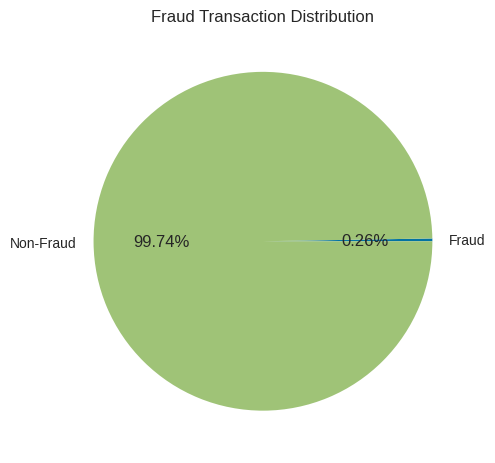

In [ ]:
plt.pie(pie_df['Amount'], labels=pie_df['Transaction Type'], autopct='%1.2f%%')
plt.title('Fraud Transaction Distribution')

plt.savefig("1b.png", dpi=300, bbox_inches='tight')
plt.show()

## c. Transaction behaviour per card brand

In [ ]:
df_card_brand = df_finalcard.groupby('card_brand')[['count_nonfraud_trx_L6M', 'amt_nonfraud_trx_L6M']].mean()
df_card_brand

count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M
card_brand                                              
Amex                        170.49        149,226,362.45
JCB                         125.37        111,451,840.58
Mastercard                  182.93        120,915,253.97
Visa                        174.66        124,359,936.13

In [ ]:
df_card_brandsum = df_finalcard.groupby('card_brand')[['count_nonfraud_trx_L6M' , 'amt_nonfraud_trx_L6M']].sum()
df_card_brandsum

count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M
card_brand                                              
Amex                         44499     38,948,080,600.00
JCB                          17301     15,380,354,000.00
Mastercard                  342999    226,716,101,200.00
Visa                        245573    174,850,070,200.00

In [ ]:
df_card_brandsum['avg']= df_card_brandsum['amt_nonfraud_trx_L6M'] / df_card_brandsum['count_nonfraud_trx_L6M']
sorted = df_card_brandsum.sort_values(by='avg', ascending=False)
sorted_amt = df_card_brand.sort_values(by='amt_nonfraud_trx_L6M', ascending=False)
sorted_ct = df_card_brand.sort_values(by='count_nonfraud_trx_L6M', ascending=False)

sorted

count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M        avg
card_brand                                                         
JCB                          17301     15,380,354,000.00 888,986.42
Amex                         44499     38,948,080,600.00 875,257.43
Visa                        245573    174,850,070,200.00 712,008.53
Mastercard                  342999    226,716,101,200.00 660,981.81

In [ ]:
sorted_amt

count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M
card_brand                                              
Amex                        170.49        149,226,362.45
Visa                        174.66        124,359,936.13
Mastercard                  182.93        120,915,253.97
JCB                         125.37        111,451,840.58

In [ ]:
sorted_ct

count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M
card_brand                                              
Mastercard                  182.93        120,915,253.97
Visa                        174.66        124,359,936.13
Amex                        170.49        149,226,362.45
JCB                         125.37        111,451,840.58

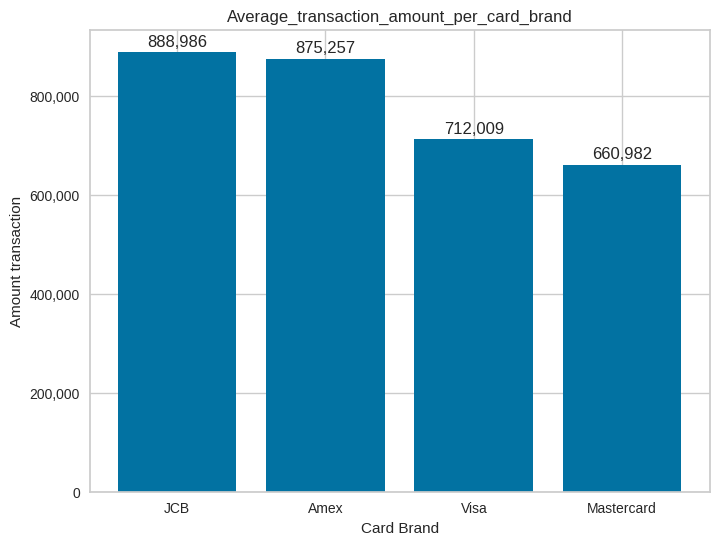

In [ ]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(8, 6))

plt.bar(sorted.index, sorted['avg'])
plt.xlabel('Card Brand')
plt.ylabel('Amount transaction')
plt.title('Average_transaction_amount_per_card_brand')

# Format bar labels
plt.bar_label(
    plt.gca().containers[0],
    labels=[f"{v:,.0f}" for v in sorted['avg']],
    padding=2
)

# Format y-axis ticks to match bar labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))


plt.savefig("1c-.png", dpi=300, bbox_inches='tight')
plt.show()


[Text(0, 2, '149,226,362'),
 Text(0, 2, '111,451,841'),
 Text(0, 2, '120,915,254'),
 Text(0, 2, '124,359,936')]

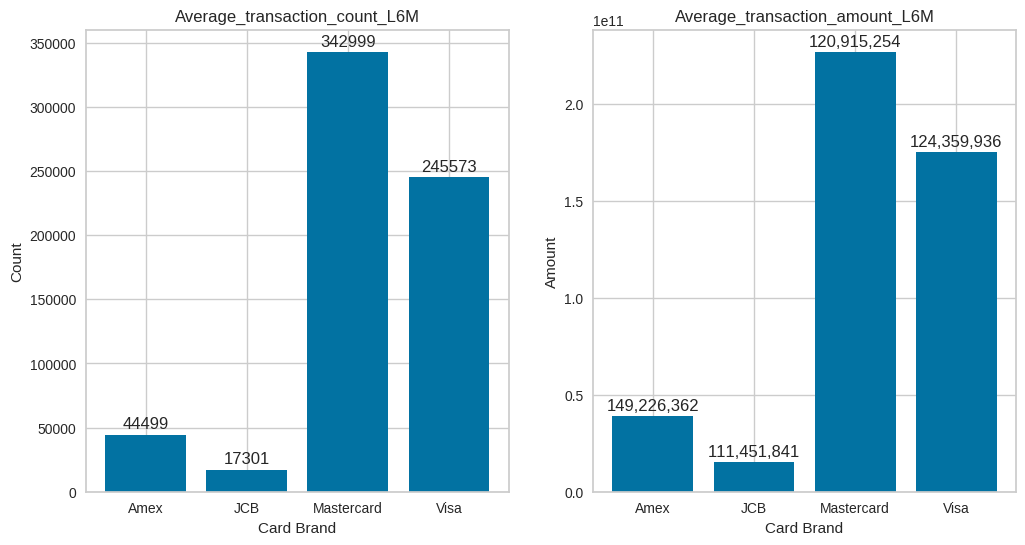

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,6)) # Creating subplot

value = ax[0].bar(df_card_brandsum.index, df_card_brandsum['count_nonfraud_trx_L6M']) # First visual avg transaction count
ax[0].set_title('Average_transaction_count_L6M')
ax[0].set_xlabel('Card Brand')
ax[0].set_ylabel('Count')
ax[0].bar_label(value, padding = 2)

value2 = ax[1].bar(df_card_brandsum.index, df_card_brandsum['amt_nonfraud_trx_L6M']) # Second visual avg transaction amount
ax[1].set_title('Average_transaction_amount_L6M')
ax[1].set_xlabel('Card Brand')
ax[1].set_ylabel('Amount')
ax[1].bar_label(value2, labels=[f"{v:,.0f}" for v in df_card_brand['amt_nonfraud_trx_L6M']], padding=2)


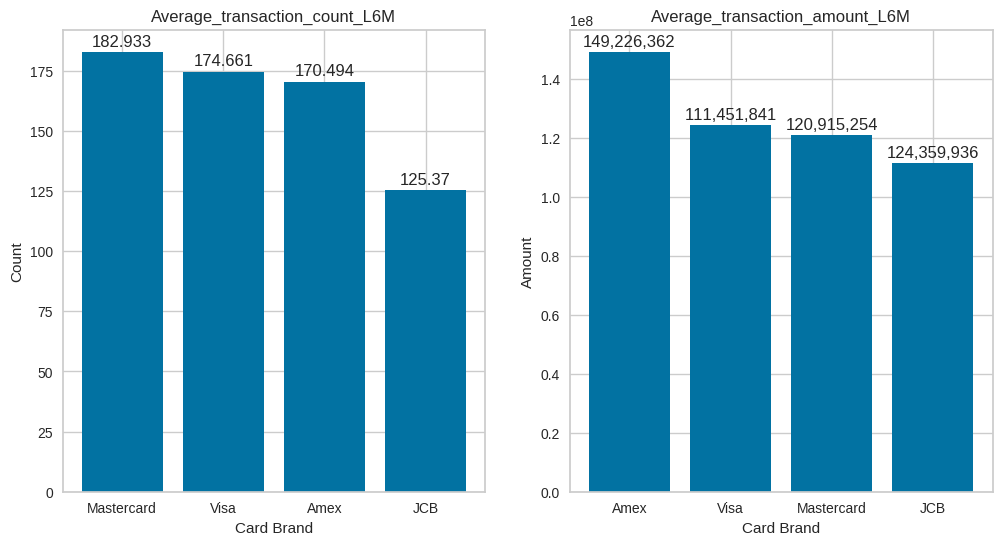

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,6)) # Creating subplot

value = ax[0].bar(sorted_ct.index, sorted_ct['count_nonfraud_trx_L6M']) # First visual avg transaction count
ax[0].set_title('Average_transaction_count_L6M')
ax[0].set_xlabel('Card Brand')
ax[0].set_ylabel('Count')
ax[0].bar_label(value, padding = 2)

value2 = ax[1].bar(sorted_amt.index, sorted_amt['amt_nonfraud_trx_L6M']) # Second visual avg transaction amount
ax[1].set_title('Average_transaction_amount_L6M')
ax[1].set_xlabel('Card Brand')
ax[1].set_ylabel('Amount')
ax[1].bar_label(value2, labels=[f"{v:,.0f}" for v in df_card_brand['amt_nonfraud_trx_L6M']], padding=2)

plt.savefig("1c.png", dpi=300, bbox_inches='tight')

## d. Retired vs non-retired DTI comparison

In [ ]:
df_usercopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   object        
 1   retirement_age     2000 non-null   int64         
 2   birthdate          2000 non-null   datetime64[ns]
 3   gender             2000 non-null   object        
 4   per_capita_income  2000 non-null   float64       
 5   yearly_income      2000 non-null   float64       
 6   total_debt         2000 non-null   float64       
 7   credit_score       2000 non-null   int64         
 8   age                2000 non-null   float64       
 9   retirement_flag    2000 non-null   object        
 10  DTI                2000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 172.0+ KB


In [ ]:
df_usercopy.groupby('retirement_flag')['DTI'].describe()

count  mean  std  min  25%  50%  75%  max
retirement_flag                                             
Retired           290.00  0.07 0.07 0.00 0.01 0.04 0.10 0.42
Working_age     1,710.00  0.30 0.15 0.00 0.21 0.30 0.39 0.95

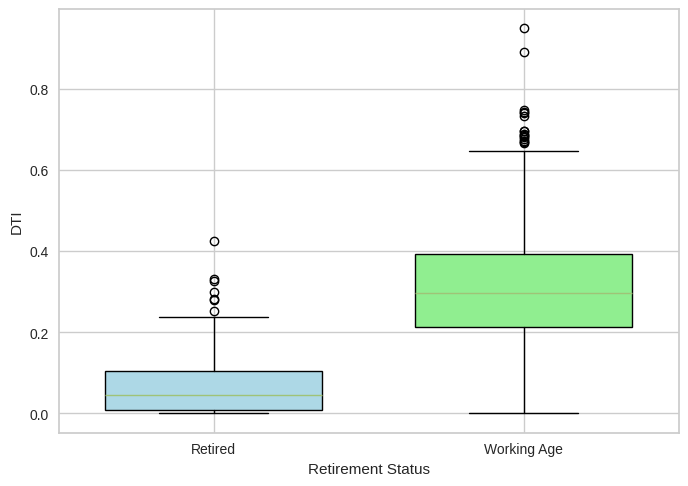

In [ ]:
# Plotting boxplot
bp = plt.boxplot(
    [
        df_usercopy[df_usercopy['retirement_flag'] == 'Retired']['DTI'],
        df_usercopy[df_usercopy['retirement_flag'] == 'Working_age']['DTI']
    ],
    patch_artist=True,
    widths=0.7
)

# Change box colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Labels
plt.xticks([1, 2], ['Retired', 'Working Age'])
plt.xlabel('Retirement Status')
plt.ylabel('DTI')

plt.savefig("1d.png", dpi=300, bbox_inches='tight')
plt.show()

## Merging card and user table

In [ ]:
df_finalcard.head()

id client_id  card_brand       card_number    expires  cvv  credit_limit  \
0  0      1362        Amex   393314135668401 2030-04-01  866 53,189,000.00   
1  1       550  Mastercard  5278231764792292 2030-06-01  396 18,200,000.00   
2  2       556  Mastercard  5889825928297675 2027-09-01  422 31,298,000.00   
3  3      1937        Visa  4289888672554714 2026-04-01  736 25,732,000.00   
4  4      1981  Mastercard  5433366978583845 2030-03-01  530 30,500,000.00   

  acct_open_date year_pin_last_changed  days_since_last_trx  \
0     1996-01-01            2019-01-01                   17   
1     1999-01-01            2018-01-01                   27   
2     2000-01-01            2016-01-01                   20   
3     2000-01-01            2020-01-01                    7   
4     2002-01-01            2012-01-01                   14   

   count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                     181        177,057,300.00                 <NA>   
1                     148        135,687,100.00                 <NA>   
2                     415        186,723,300.00                 <NA>   
3                     148        207,881,500.00                 <NA>   
4                      48         28,007,500.00                 <NA>   

   amt_fraud_trx_L6M  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [ ]:
df_usercopy.head()

id  retirement_age  birthdate  gender  per_capita_income  yearly_income  \
0   825              66 1972-11-25  Female      45,937,000.00  93,663,000.00   
1  1746              68 1972-12-16  Female      59,451,000.00 121,212,000.00   
2  1718              67 1944-11-04  Female      35,586,000.00  52,535,000.00   
3   708              63 1963-01-12  Female     255,975,000.00 392,132,000.00   
4  1164              70 1982-09-21    Male      84,407,000.00 172,099,000.00   

     total_debt  credit_score   age retirement_flag  DTI  
0 38,138,095.00           787 53.00     Working_age 0.41  
1 57,186,095.00           701 52.00     Working_age 0.47  
2     58,666.00           698 81.00         Retired 0.00  
3 60,467,238.00           722 62.00     Working_age 0.15  
4 54,946,285.00           675 43.00     Working_age 0.32

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_merged = df_finalcard.merge(df_usercopy, left_on='client_id', right_on='id', how='left').set_index('id_x')
df_merged

client_id  card_brand       card_number    expires  cvv  credit_limit  \
id_x                                                                         
0         1362        Amex   393314135668401 2030-04-01  866 53,189,000.00   
1          550  Mastercard  5278231764792292 2030-06-01  396 18,200,000.00   
2          556  Mastercard  5889825928297675 2027-09-01  422 31,298,000.00   
3         1937        Visa  4289888672554714 2026-04-01  736 25,732,000.00   
4         1981  Mastercard  5433366978583845 2030-03-01  530 30,500,000.00   
...        ...         ...               ...        ...  ...           ...   
6141       715  Mastercard  5369522792349411 2028-08-01  597 57,378,000.00   
6142      1236  Mastercard  5791756986936871 2030-11-01  196 19,178,000.00   
6143       253  Mastercard  5482273460029161 2030-07-01   79 38,739,000.00   
6144       737  Mastercard  5413710543564908 2030-10-01  454 10,355,000.00   
6145       682        Visa  4605950682175499 2026-08-01  517 25,178,000.00   

     acct_open_date year_pin_last_changed  days_since_last_trx  \
id_x                                                             
0        1996-01-01            2019-01-01                   17   
1        1999-01-01            2018-01-01                   27   
2        2000-01-01            2016-01-01                   20   
3        2000-01-01            2020-01-01                    7   
4        2002-01-01            2012-01-01                   14   
...             ...                   ...                  ...   
6141     2022-08-01            2024-01-01                  604   
6142     2024-12-01            2024-01-01                  604   
6143     2024-12-01            2024-01-01                  604   
6144     2024-12-01            2024-01-01                  604   
6145     2020-08-01            2024-01-01                  604   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
id_x                                                                      
0                        181        177,057,300.00                 <NA>   
1                        148        135,687,100.00                 <NA>   
2                        415        186,723,300.00                 <NA>   
3                        148        207,881,500.00                 <NA>   
4                         48         28,007,500.00                 <NA>   
...                      ...                   ...                  ...   
6141                    <NA>                   NaN                 <NA>   
6142                    <NA>                   NaN                 <NA>   
6143                    <NA>                   NaN                 <NA>   
6144                    <NA>                   NaN                 <NA>   
6145                    <NA>                   NaN                 <NA>   

      amt_fraud_trx_L6M  id_y  retirement_age  birthdate  gender  \
id_x                                                               
0                   NaN  1362              67 1968-01-24    Male   
1                   NaN   550              70 1950-02-25    Male   
2                   NaN   556              66 1979-12-12    Male   
3                   NaN  1937              62 1961-02-12  Female   
4                   NaN  1981              65 1978-01-24    Male   
...                 ...   ...             ...        ...     ...   
6141                NaN   715              75 1989-01-07  Female   
6142                NaN  1236              65 1953-09-06  Female   
6143                NaN   253              62 1965-01-15    Male   
6144                NaN   737              60 1964-03-28  Female   
6145                NaN   682              62 1967-10-02    Male   

      per_capita_income  yearly_income    total_debt  credit_score   age  \
id_x                                                                       
0         55,798,000.00 113,768,000.00 13,244,380.00           727 57.00   
1         33,293,000.00  47,459,000.00 10,

In [ ]:
df_merged[df_merged['client_id'] == 0]

Empty DataFrame
Columns: [client_id, card_brand, card_number, expires, cvv, credit_limit, acct_open_date, year_pin_last_changed, days_since_last_trx, count_nonfraud_trx_L6M, amt_nonfraud_trx_L6M, count_fraud_trx_L6M, amt_fraud_trx_L6M, id_y, retirement_age, birthdate, gender, per_capita_income, yearly_income, total_debt, credit_score, age, retirement_flag, DTI]
Index: []

## e. Average DTI per credit score

In [ ]:
bins = [300, 579, 739, 799, 850] # FICO credit score ranges
labels = ['Poor', 'Fair', 'Good', 'Excellent']
df_merged['credit_status'] = pd.cut(df_merged['credit_score'], bins=bins, labels=labels, include_lowest=True)
df_merged

client_id  card_brand       card_number    expires  cvv  credit_limit  \
id_x                                                                         
0         1362        Amex   393314135668401 2030-04-01  866 53,189,000.00   
1          550  Mastercard  5278231764792292 2030-06-01  396 18,200,000.00   
2          556  Mastercard  5889825928297675 2027-09-01  422 31,298,000.00   
3         1937        Visa  4289888672554714 2026-04-01  736 25,732,000.00   
4         1981  Mastercard  5433366978583845 2030-03-01  530 30,500,000.00   
...        ...         ...               ...        ...  ...           ...   
6141       715  Mastercard  5369522792349411 2028-08-01  597 57,378,000.00   
6142      1236  Mastercard  5791756986936871 2030-11-01  196 19,178,000.00   
6143       253  Mastercard  5482273460029161 2030-07-01   79 38,739,000.00   
6144       737  Mastercard  5413710543564908 2030-10-01  454 10,355,000.00   
6145       682        Visa  4605950682175499 2026-08-01  517 25,178,000.00   

     acct_open_date year_pin_last_changed  days_since_last_trx  \
id_x                                                             
0        1996-01-01            2019-01-01                   17   
1        1999-01-01            2018-01-01                   27   
2        2000-01-01            2016-01-01                   20   
3        2000-01-01            2020-01-01                    7   
4        2002-01-01            2012-01-01                   14   
...             ...                   ...                  ...   
6141     2022-08-01            2024-01-01                  604   
6142     2024-12-01            2024-01-01                  604   
6143     2024-12-01            2024-01-01                  604   
6144     2024-12-01            2024-01-01                  604   
6145     2020-08-01            2024-01-01                  604   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
id_x                                                                      
0                        181        177,057,300.00                 <NA>   
1                        148        135,687,100.00                 <NA>   
2                        415        186,723,300.00                 <NA>   
3                        148        207,881,500.00                 <NA>   
4                         48         28,007,500.00                 <NA>   
...                      ...                   ...                  ...   
6141                    <NA>                   NaN                 <NA>   
6142                    <NA>                   NaN                 <NA>   
6143                    <NA>                   NaN                 <NA>   
6144                    <NA>                   NaN                 <NA>   
6145                    <NA>                   NaN                 <NA>   

      amt_fraud_trx_L6M  id_y  retirement_age  birthdate  gender  \
id_x                                                               
0                   NaN  1362              67 1968-01-24    Male   
1                   NaN   550              70 1950-02-25    Male   
2                   NaN   556              66 1979-12-12    Male   
3                   NaN  1937              62 1961-02-12  Female   
4                   NaN  1981              65 1978-01-24    Male   
...                 ...   ...             ...        ...     ...   
6141                NaN   715              75 1989-01-07  Female   
6142                NaN  1236              65 1953-09-06  Female   
6143                NaN   253              62 1965-01-15    Male   
6144                NaN   737              60 1964-03-28  Female   
6145                NaN   682              62 1967-10-02    Male   

      per_capita_income  yearly_income    total_debt  credit_score   age  \
id_x                                                                       
0         55,798,000.00 113,768,000.00 13,244,380.00           727 57.00   
1         33,293,000.00  47,459,000.00 10,

In [ ]:
DTI_creditscore = df_merged.groupby('credit_status')[['DTI', 'amt_nonfraud_trx_L6M','count_nonfraud_trx_L6M']].mean().sort_values(by='DTI', ascending=False)
DTI_creditscore

/tmp/ipython-input-4258629697.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DTI_creditscore = df_merged.groupby('credit_status')[['DTI', 'amt_nonfraud_trx_L6M','count_nonfraud_trx_L6M']].mean().sort_values(by='DTI', ascending=False)


DTI  amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M
credit_status                                                   
Poor          0.27        187,606,774.47                  250.23
Fair          0.25        126,094,507.56                  176.55
Excellent     0.23        114,348,157.01                  173.02
Good          0.22        115,868,357.22                  171.36

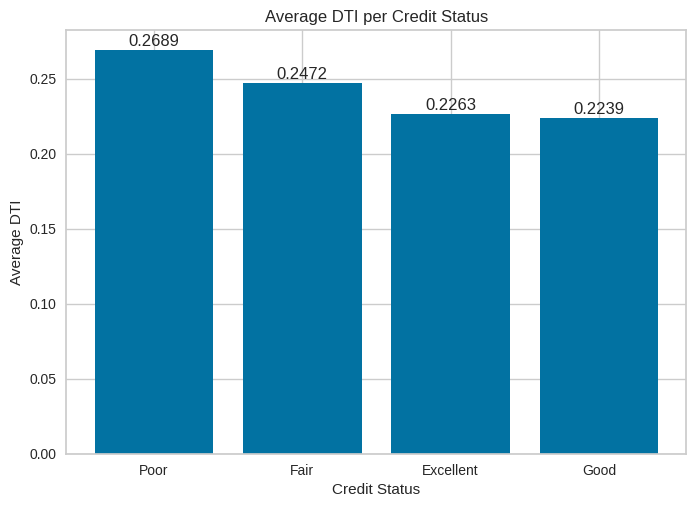

In [ ]:
value_dtics = plt.bar(DTI_creditscore.index, DTI_creditscore['DTI'])

plt.xlabel('Credit Status')
plt.ylabel('Average DTI')
plt.bar_label(value_dtics, labels=[f"{v:,.4f}" for v in DTI_creditscore['DTI']], padding= 1)
plt.title('Average DTI per Credit Status')

plt.savefig("1e.png", dpi=300, bbox_inches='tight')
plt.show()

## f. Credit limit per age

In [ ]:
credlim_age = (df_merged.groupby('age')['credit_limit'].sum())
credlim_age

age
17.00    2,229,891,000.00
18.00    1,508,715,000.00
19.00    1,621,742,000.00
20.00    1,504,542,000.00
21.00    1,904,930,000.00
               ...       
92.00      500,916,000.00
93.00      442,014,000.00
98.00      283,658,000.00
99.00      215,941,000.00
101.00      41,198,000.00
Name: credit_limit, Length: 80, dtype: float64

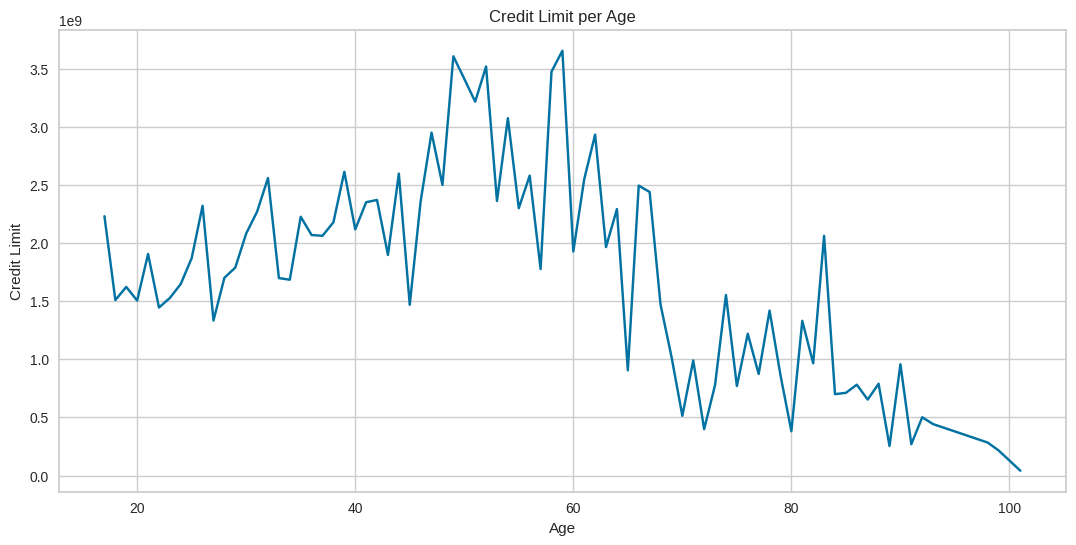

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot(credlim_age.index, credlim_age.values)
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.title('Credit Limit per Age')
plt.show()

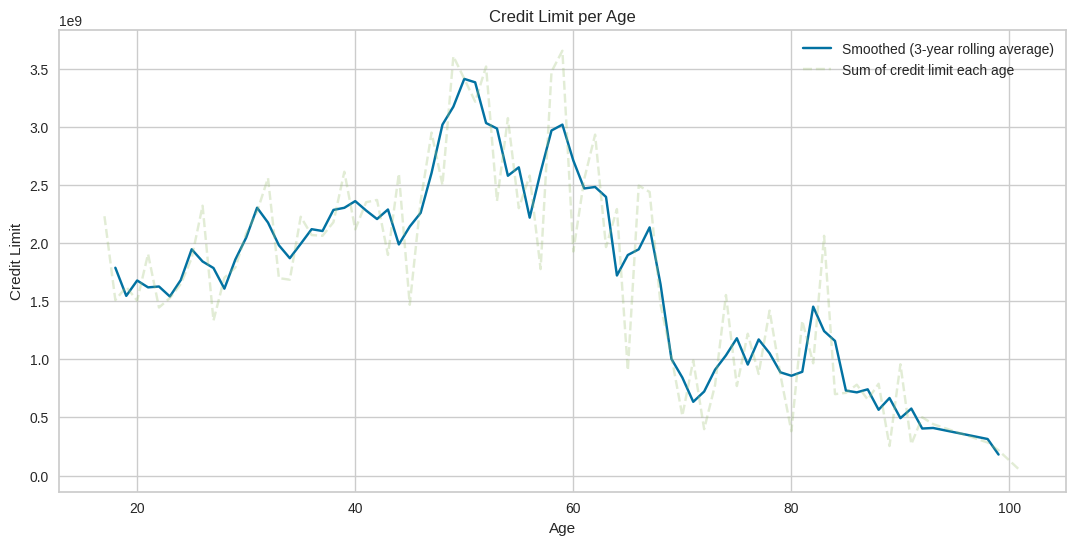

In [ ]:
credlim_age_smoothed = credlim_age.rolling(window=3, center=True).mean()

plt.figure(figsize=(13, 6))
plt.plot(credlim_age.index, credlim_age_smoothed, label='Smoothed (3-year rolling average)')
plt.plot(credlim_age.index, credlim_age.values, alpha=0.3, label='Sum of credit limit each age', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.title('Credit Limit per Age')
plt.legend()

plt.savefig("1f.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-4247773738.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credlim_age_binned = credlim_age.groupby(age_bins).mean()


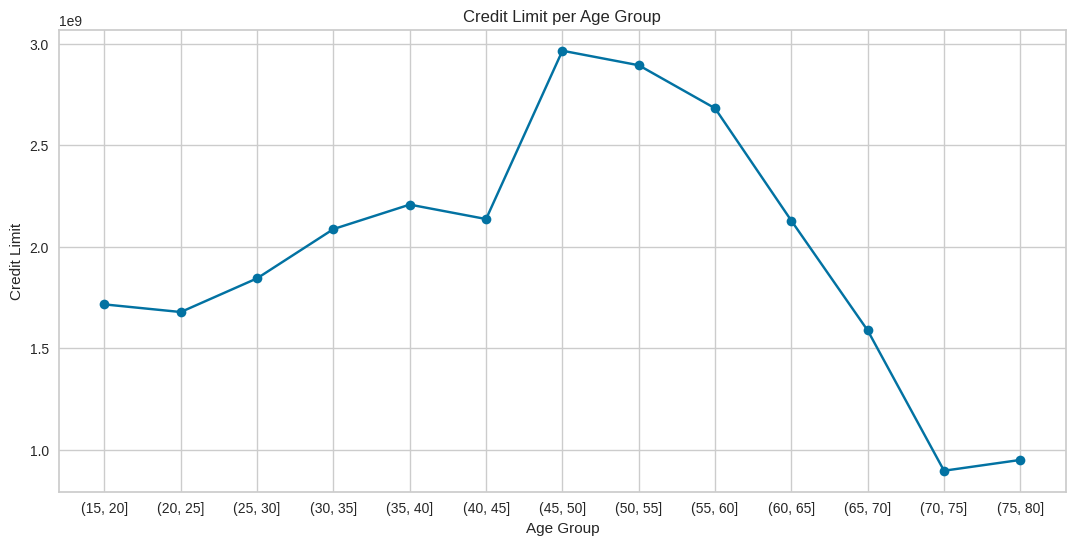

In [ ]:
age_bins = pd.cut(credlim_age.index, bins=range(15, 85, 5))  # 5-year bins
credlim_age_binned = credlim_age.groupby(age_bins).mean()

plt.figure(figsize=(13, 6))
plt.plot(credlim_age_binned.index.astype(str), credlim_age_binned.values, marker='o')
plt.xlabel('Age Group')
plt.ylabel('Credit Limit')
plt.title('Credit Limit per Age Group')
plt.show()

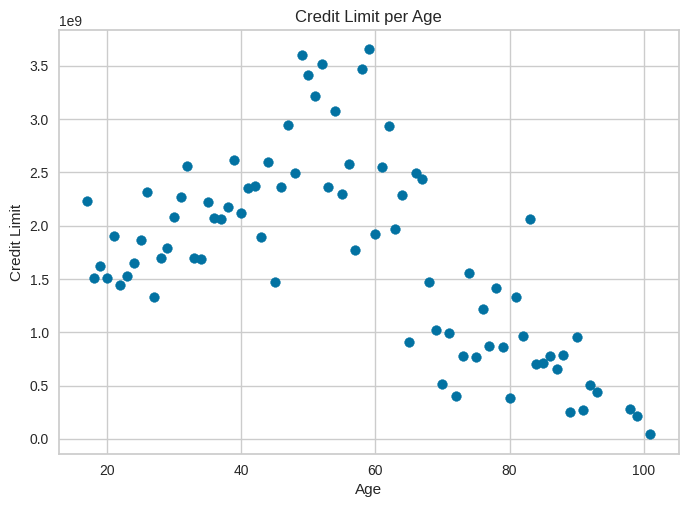

In [ ]:
plt.scatter(credlim_age.index, credlim_age.values)
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.title('Credit Limit per Age')
plt.show()

In [ ]:
df_usercopy

id  retirement_age  birthdate  gender  per_capita_income  \
0      825              66 1972-11-25  Female      45,937,000.00   
1     1746              68 1972-12-16  Female      59,451,000.00   
2     1718              67 1944-11-04  Female      35,586,000.00   
3      708              63 1963-01-12  Female     255,975,000.00   
4     1164              70 1982-09-21    Male      84,407,000.00   
...    ...             ...        ...     ...                ...   
1995   986              70 1993-07-06    Male      36,950,000.00   
1996  1944              65 1963-11-12  Female      37,998,000.00   
1997   185              67 1979-01-30  Female      23,810,000.00   
1998  1007              60 1960-02-23    Male      39,752,000.00   
1999  1110              60 2004-11-07  Female      50,718,000.00   

      yearly_income    total_debt  credit_score   age retirement_flag  DTI  
0     93,663,000.00 38,138,095.00           787 53.00     Working_age 0.41  
1    121,212,000.00 57,186,095.00           701 52.00     Working_age 0.47  
2     52,535,000.00     58,666.00           698 81.00         Retired 0.00  
3    392,132,000.00 60,467,238.00           722 62.00     Working_age 0.15  
4    172,099,000.00 54,946,285.00           675 43.00     Working_age 0.32  
...             ...           ...           ...   ...             ...  ...  
1995  75,328,000.00 26,250,666.00           703 32.00     Working_age 0.35  
1996  77,474,000.00 31,224,571.00           740 62.00     Working_age 0.40  
1997  48,548,000.00 21,238,666.00           779 46.00     Working_age 0.44  
1998  85,752,000.00  8,141,142.00           618 65.00         Retired 0.09  
1999 103,411,000.00 54,171,238.00           673 21.00     Working_age 0.52  

[2000 rows x 11 columns]

In [ ]:
df_finalcard

id client_id  card_brand       card_number    expires  cvv  \
0        0      1362        Amex   393314135668401 2030-04-01  866   
1        1       550  Mastercard  5278231764792292 2030-06-01  396   
2        2       556  Mastercard  5889825928297675 2027-09-01  422   
3        3      1937        Visa  4289888672554714 2026-04-01  736   
4        4      1981  Mastercard  5433366978583845 2030-03-01  530   
...    ...       ...         ...               ...        ...  ...   
5563  6141       715  Mastercard  5369522792349411 2028-08-01  597   
5564  6142      1236  Mastercard  5791756986936871 2030-11-01  196   
5565  6143       253  Mastercard  5482273460029161 2030-07-01   79   
5566  6144       737  Mastercard  5413710543564908 2030-10-01  454   
5567  6145       682        Visa  4605950682175499 2026-08-01  517   

      credit_limit acct_open_date year_pin_last_changed  days_since_last_trx  \
0    53,189,000.00     1996-01-01            2019-01-01                   17   
1    18,200,000.00     1999-01-01            2018-01-01                   27   
2    31,298,000.00     2000-01-01            2016-01-01                   20   
3    25,732,000.00     2000-01-01            2020-01-01                    7   
4    30,500,000.00     2002-01-01            2012-01-01                   14   
...            ...            ...                   ...                  ...   
5563 57,378,000.00     2022-08-01            2024-01-01                  604   
5564 19,178,000.00     2024-12-01            2024-01-01                  604   
5565 38,739,000.00     2024-12-01            2024-01-01                  604   
5566 10,355,000.00     2024-12-01            2024-01-01                  604   
5567 25,178,000.00     2020-08-01            2024-01-01                  604   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
0                        181        177,057,300.00                 <NA>   
1                        148        135,687,100.00                 <NA>   
2                        415        186,723,300.00                 <NA>   
3                        148        207,881,500.00                 <NA>   
4                         48         28,007,500.00                 <NA>   
...                      ...                   ...                  ...   
5563                    <NA>                   NaN                 <NA>   
5564                    <NA>                   NaN                 <NA>   
5565                    <NA>                   NaN                 <NA>   
5566                    <NA>                   NaN                 <NA>   
5567                    <NA>                   NaN                 <NA>   

      amt_fraud_trx_L6M  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
5563                NaN  
5564                NaN  
5565                NaN  
5566                NaN  
5567                NaN  

[5528 rows x 14 columns]

In [ ]:
df_merged

client_id  card_brand       card_number    expires  cvv  credit_limit  \
id_x                                                                         
0         1362        Amex   393314135668401 2030-04-01  866 53,189,000.00   
1          550  Mastercard  5278231764792292 2030-06-01  396 18,200,000.00   
2          556  Mastercard  5889825928297675 2027-09-01  422 31,298,000.00   
3         1937        Visa  4289888672554714 2026-04-01  736 25,732,000.00   
4         1981  Mastercard  5433366978583845 2030-03-01  530 30,500,000.00   
...        ...         ...               ...        ...  ...           ...   
6141       715  Mastercard  5369522792349411 2028-08-01  597 57,378,000.00   
6142      1236  Mastercard  5791756986936871 2030-11-01  196 19,178,000.00   
6143       253  Mastercard  5482273460029161 2030-07-01   79 38,739,000.00   
6144       737  Mastercard  5413710543564908 2030-10-01  454 10,355,000.00   
6145       682        Visa  4605950682175499 2026-08-01  517 25,178,000.00   

     acct_open_date year_pin_last_changed  days_since_last_trx  \
id_x                                                             
0        1996-01-01            2019-01-01                   17   
1        1999-01-01            2018-01-01                   27   
2        2000-01-01            2016-01-01                   20   
3        2000-01-01            2020-01-01                    7   
4        2002-01-01            2012-01-01                   14   
...             ...                   ...                  ...   
6141     2022-08-01            2024-01-01                  604   
6142     2024-12-01            2024-01-01                  604   
6143     2024-12-01            2024-01-01                  604   
6144     2024-12-01            2024-01-01                  604   
6145     2020-08-01            2024-01-01                  604   

      count_nonfraud_trx_L6M  amt_nonfraud_trx_L6M  count_fraud_trx_L6M  \
id_x                                                                      
0                        181        177,057,300.00                 <NA>   
1                        148        135,687,100.00                 <NA>   
2                        415        186,723,300.00                 <NA>   
3                        148        207,881,500.00                 <NA>   
4                         48         28,007,500.00                 <NA>   
...                      ...                   ...                  ...   
6141                    <NA>                   NaN                 <NA>   
6142                    <NA>                   NaN                 <NA>   
6143                    <NA>                   NaN                 <NA>   
6144                    <NA>                   NaN                 <NA>   
6145                    <NA>                   NaN                 <NA>   

      amt_fraud_trx_L6M  id_y  retirement_age  birthdate  gender  \
id_x                                                               
0                   NaN  1362              67 1968-01-24    Male   
1                   NaN   550              70 1950-02-25    Male   
2                   NaN   556              66 1979-12-12    Male   
3                   NaN  1937              62 1961-02-12  Female   
4                   NaN  1981              65 1978-01-24    Male   
...                 ...   ...             ...        ...     ...   
6141                NaN   715              75 1989-01-07  Female   
6142                NaN  1236              65 1953-09-06  Female   
6143                NaN   253              62 1965-01-15    Male   
6144                NaN   737              60 1964-03-28  Female   
6145                NaN   682              62 1967-10-02    Male   

      per_capita_income  yearly_income    total_debt  credit_score   age  \
id_x                                                                       
0         55,798,000.00 113,768,000.00 13,244,380.00           727 57.00   
1         33,293,000.00  47,459,000.00 10,

In [ ]:
df_merged['client_id'].duplicated().sum()

np.int64(3590)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5528 entries, 0 to 6145
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   client_id               5528 non-null   object        
 1   card_brand              5528 non-null   object        
 2   card_number             5528 non-null   object        
 3   expires                 5528 non-null   datetime64[ns]
 4   cvv                     5528 non-null   int64         
 5   credit_limit            5528 non-null   float64       
 6   acct_open_date          5528 non-null   datetime64[ns]
 7   year_pin_last_changed   5528 non-null   datetime64[ns]
 8   days_since_last_trx     5528 non-null   int64         
 9   count_nonfraud_trx_L6M  3680 non-null   Int64         
 10  amt_nonfraud_trx_L6M    3680 non-null   float64       
 11  count_fraud_trx_L6M     547 non-null    Int64         
 12  amt_fraud_trx_L6M       547 non-null    float64      

# **Customer Segmentation**

## Data Preparation

### Merging data

In [ ]:
# Grouping data for Customer Segementation
user_merged_OR = df_merged.groupby('client_id').agg(
    {
        'amt_nonfraud_trx_L6M' : 'sum',
        'count_nonfraud_trx_L6M' : 'sum',
        'credit_limit' : 'sum',
        'DTI' : 'max',
        'days_since_last_trx' : 'min',
        'age' : 'max',
        'retirement_flag' : 'max'}
)

user_merged_OR

amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M   credit_limit  DTI  \
client_id                                                                     
0                535,262,100.00                     685 165,775,000.00 0.12   
1                264,007,900.00                     498  65,592,000.00 0.06   
10                         0.00                       0 108,249,000.00 0.30   
100              295,701,900.00                     366 236,386,000.00 0.31   
1000                       0.00                       0  36,225,000.00 0.32   
...                         ...                     ...            ...  ...   
995                        0.00                       0  29,963,000.00 0.58   
996              570,563,000.00                     871 154,043,000.00 0.51   
997              674,910,900.00                    1178  53,660,000.00 0.37   
998                        0.00                       0  32,579,000.00 0.13   
999                        0.00                       0 128,136,000.00 0.42   

           days_since_last_trx   age retirement_flag  
client_id                                             
0                            3 33.00     Working_age  
1                           20 43.00     Working_age  
10                         604 29.00     Working_age  
100                          5 56.00     Working_age  
1000                       604 20.00     Working_age  
...                        ...   ...             ...  
995                        604 40.00     Working_age  
996                          0 63.00     Working_age  
997                          2 56.00     Working_age  
998                        604 18.00     Working_age  
999                        604 19.00     Working_age  

[1938 rows x 7 columns]

### Taking out outliers

<Axes: ylabel='amt_nonfraud_trx_L6M'>

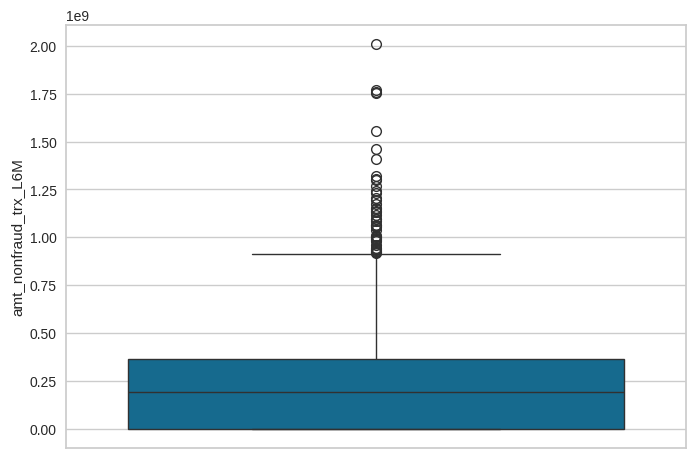

In [ ]:
sns.boxplot(data = user_merged_OR, y = 'amt_nonfraud_trx_L6M')

<Axes: ylabel='DTI'>

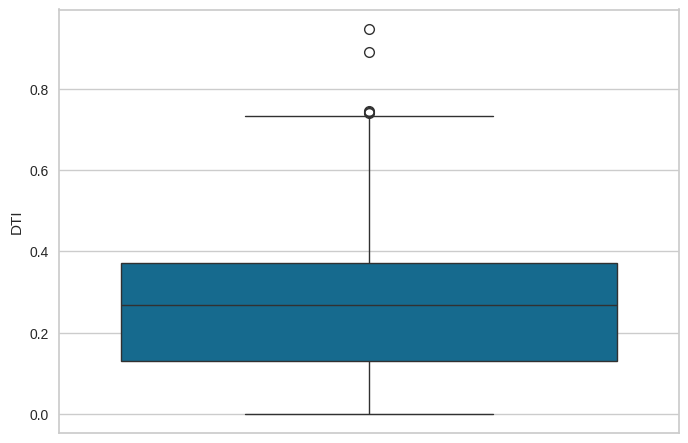

In [ ]:
sns.boxplot(data = user_merged_OR, y = 'DTI')

<Axes: ylabel='count_nonfraud_trx_L6M'>

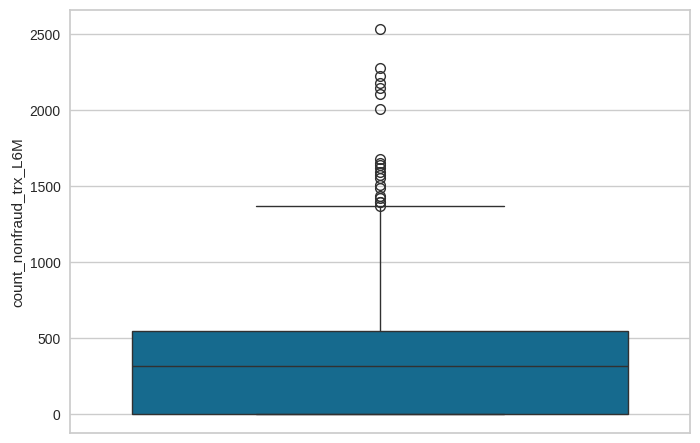

In [ ]:
sns.boxplot(data = user_merged_OR, y = 'count_nonfraud_trx_L6M')

<Axes: ylabel='credit_limit'>

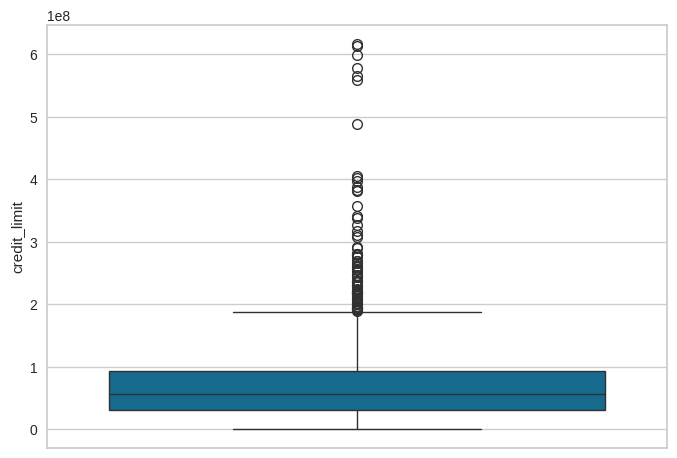

In [ ]:
sns.boxplot(data = user_merged_OR, y = 'credit_limit')

In [ ]:
amt_q1 = user_merged_OR['amt_nonfraud_trx_L6M'].quantile(0.25)
amt_q3 = user_merged_OR['amt_nonfraud_trx_L6M'].quantile(0.75)
amt_iqr = amt_q3 - amt_q1

amt_lower_bound = amt_q1 - (1.5 * amt_iqr)
amt_upper_bound = amt_q3 + (1.5 * amt_iqr)
#-------------------------------------------------------------
cnt_q1 = user_merged_OR['count_nonfraud_trx_L6M'].quantile(0.25)
cnt_q3 = user_merged_OR['count_nonfraud_trx_L6M'].quantile(0.75)

cnt_iqr = cnt_q3 - cnt_q1
cnt_lower_bound = cnt_q1 - (1.5 * cnt_iqr)
cnt_upper_bound = cnt_q3 + (1.5 * cnt_iqr)
#--------------------------------------------------------------
credlim_q1 = user_merged_OR['credit_limit'].quantile(0.25)
credlim_q3 = user_merged_OR['credit_limit'].quantile(0.75)

credlim_iqr = credlim_q3 - credlim_q1
credlim_lower_bound = credlim_q1 - (1.5 * credlim_iqr)
credlim_upper_bound = credlim_q3 + (1.5 * credlim_iqr)

In [ ]:
df_clean_amt = user_merged_OR[
    (user_merged_OR['amt_nonfraud_trx_L6M'] >= amt_lower_bound) &
    (user_merged_OR['amt_nonfraud_trx_L6M'] <= amt_upper_bound)]

df_clean_cnt = df_clean_amt[
    (df_clean_amt['count_nonfraud_trx_L6M'] >= cnt_lower_bound) &
    (df_clean_amt['count_nonfraud_trx_L6M'] <= cnt_upper_bound)]

df_clean = df_clean_cnt[
    (df_clean_cnt['credit_limit'] >= credlim_lower_bound) &
    (df_clean_cnt['credit_limit'] <= credlim_upper_bound)]

<Axes: ylabel='amt_nonfraud_trx_L6M'>

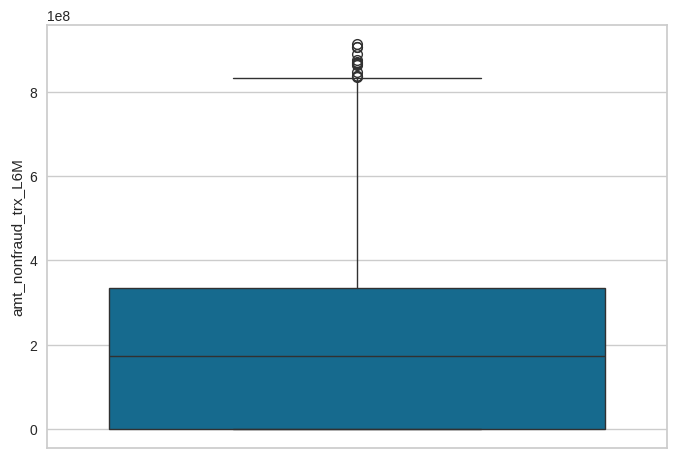

In [ ]:
sns.boxplot(data = df_clean, y = 'amt_nonfraud_trx_L6M')

<Axes: ylabel='count_nonfraud_trx_L6M'>

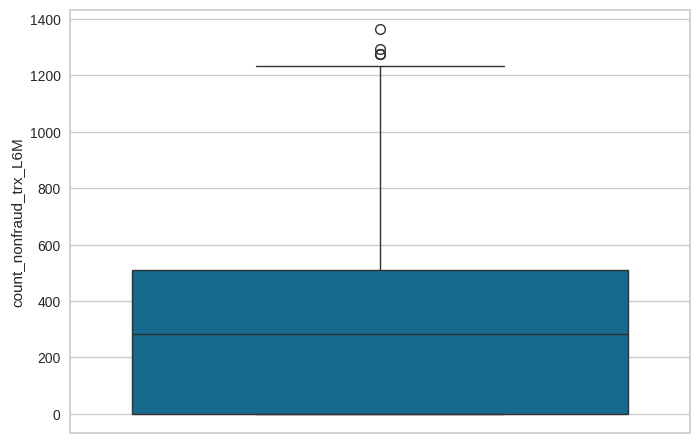

In [ ]:
sns.boxplot(data = df_clean, y = 'count_nonfraud_trx_L6M')

<Axes: ylabel='credit_limit'>

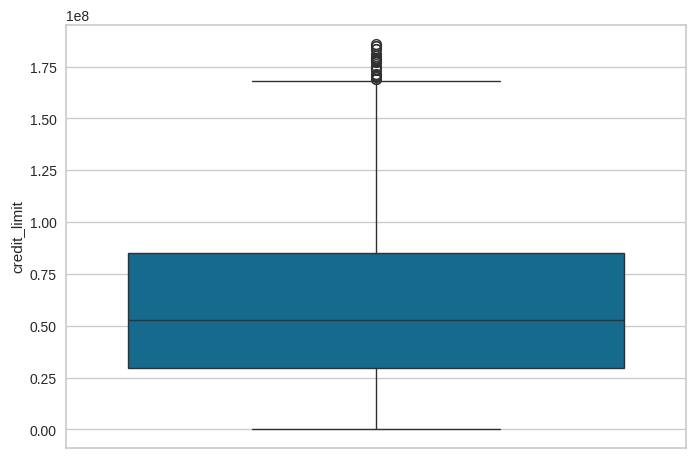

In [ ]:
sns.boxplot(data = df_clean, y = 'credit_limit')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1814 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   amt_nonfraud_trx_L6M    1814 non-null   float64
 1   count_nonfraud_trx_L6M  1814 non-null   Int64  
 2   credit_limit            1814 non-null   float64
 3   DTI                     1814 non-null   float64
 4   days_since_last_trx     1814 non-null   int64  
 5   age                     1814 non-null   float64
 6   retirement_flag         1814 non-null   object 
dtypes: Int64(1), float64(4), int64(1), object(1)
memory usage: 179.7+ KB


### Importing extra tools

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import shapiro, skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import cluster

### Features selection and cleaning

In [ ]:
features = ['amt_nonfraud_trx_L6M', 'count_nonfraud_trx_L6M', 'credit_limit', 'DTI']

In [ ]:
user_merged = df_clean[features].copy()

In [ ]:
# Changing all Dtype into float

user_merged['count_nonfraud_trx_L6M'] = user_merged['count_nonfraud_trx_L6M'].astype('float')

In [ ]:
user_merged.describe()

amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M   credit_limit      DTI
count              1,814.00                1,814.00       1,814.00 1,814.00
mean         200,697,465.49                  301.03  61,192,456.45     0.27
std          215,070,609.84                  307.87  40,770,898.03     0.17
min                    0.00                    0.00     308,000.00     0.00
25%                    0.00                    0.00  29,497,250.00     0.14
50%          173,940,400.00                  282.50  52,648,500.00     0.27
75%          333,839,625.00                  509.00  85,280,250.00     0.38
max          914,386,800.00                1,365.00 186,048,000.00     0.95

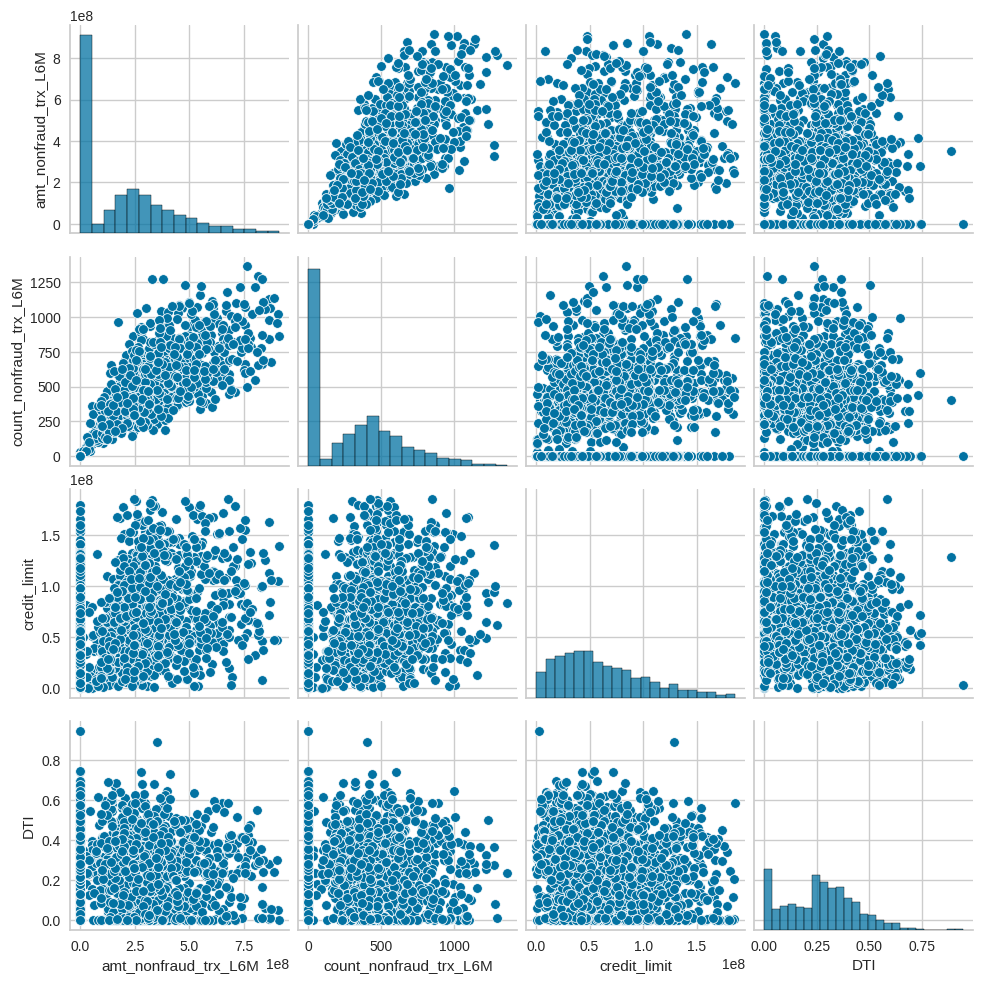

In [ ]:
sns.pairplot(user_merged)

## Feature Scaling

In [ ]:
def determine_scaler (data, column_name):
    stat, p_value = shapiro(data[column_name])
    skewness = skew(data[column_name])

    print(f"{column_name} - Shapiro-Wilk Test: Statistics={stat}, p-value{p_value}")
    print(f"{column_name} - Skewness: {skewness}")

    if p_value > 0.05 and -1 <= skewness <= 1:
        scaler = "StandartdScaler"
    elif p_value < 0.05 and -1 <= skewness <= 1:
        scaler = "MinMaxScaler"
    elif p_value < 0.05 and (skewness < -1 or skewness > 1):
        scaler: "RobustScaler"
    else:
        scaler = "RobustScaler"
    return scaler

amttrx_scaler = determine_scaler(user_merged, 'amt_nonfraud_trx_L6M')
counttrx_scaler = determine_scaler(user_merged, 'count_nonfraud_trx_L6M')
credlim_scaler = determine_scaler(user_merged, 'credit_limit')
dti_scaler = determine_scaler(user_merged, 'DTI')

print(f"Recommended scaler for amt trx: {amttrx_scaler}")
print(f"Recommended scaler for cnt trx: {counttrx_scaler}")
print(f"Recommended scaler for credlim: {credlim_scaler}")
print(f"Recommended scaler for DTI: {dti_scaler}")

amt_nonfraud_trx_L6M - Shapiro-Wilk Test: Statistics=0.8557774417508639, p-value7.421218106398371e-38
amt_nonfraud_trx_L6M - Skewness: 0.8947701908789114
count_nonfraud_trx_L6M - Shapiro-Wilk Test: Statistics=0.8657278079965395, p-value7.539336346835507e-37
count_nonfraud_trx_L6M - Skewness: 0.6937704997245847
credit_limit - Shapiro-Wilk Test: Statistics=0.9445396196426985, p-value1.444530016423888e-25
credit_limit - Skewness: 0.7756597761832557
DTI - Shapiro-Wilk Test: Statistics=0.9742598237207722, p-value1.5893786501956275e-17
DTI - Skewness: 0.1755740364913694
Recommended scaler for amt trx: MinMaxScaler
Recommended scaler for cnt trx: MinMaxScaler
Recommended scaler for credlim: MinMaxScaler
Recommended scaler for DTI: MinMaxScaler


In [ ]:
minmax_scaler = MinMaxScaler()
df_transformed = minmax_scaler.fit_transform(user_merged)
df_transformed = pd.DataFrame(df_transformed, columns=user_merged.columns)
df_transformed.describe()

amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M  credit_limit      DTI
count              1,814.00                1,814.00      1,814.00 1,814.00
mean                   0.22                    0.22          0.33     0.28
std                    0.24                    0.23          0.22     0.17
min                    0.00                    0.00          0.00     0.00
25%                    0.00                    0.00          0.16     0.14
50%                    0.19                    0.21          0.28     0.29
75%                    0.37                    0.37          0.46     0.40
max                    1.00                    1.00          1.00     1.00

In [ ]:
df_transformed.head()

amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M  credit_limit  DTI
0                  0.59                    0.50          0.89 0.12
1                  0.29                    0.36          0.35 0.06
2                  0.00                    0.00          0.58 0.32
3                  0.00                    0.00          0.19 0.34
4                  0.00                    0.00          0.07 0.34

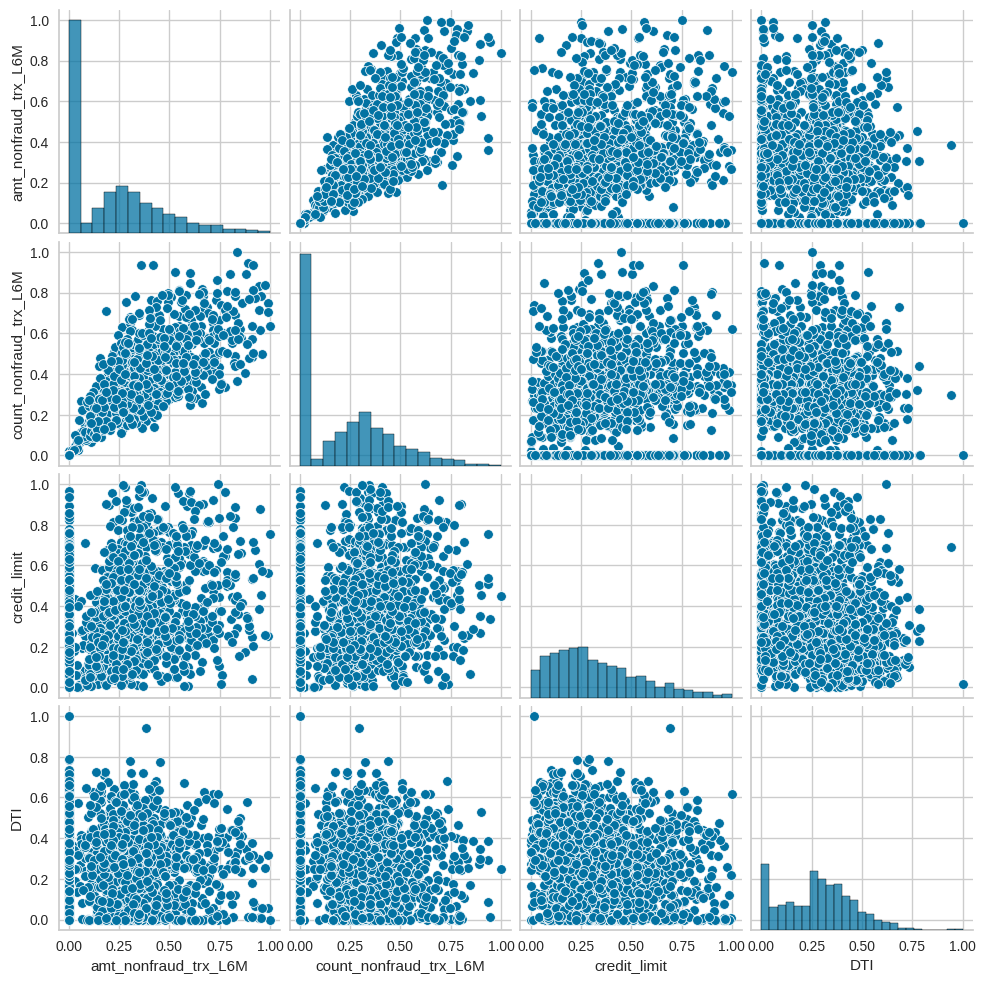

In [ ]:
sns.pairplot(df_transformed)

In [ ]:
df_model = df_transformed.copy()

## Elbow method to determine K

In [ ]:
inertia = []

K_range = range(1,14)
for K in K_range:
  kmodels = KMeans(n_clusters=K, random_state=30, n_init='auto')
  kmodels.fit(df_model)
  inertia.append(kmodels.inertia_)

inertia

[335.2389013812992,
 183.79902302553734,
 156.47149577149642,
 130.7714109274762,
 111.33672759469609,
 97.54025419937318,
 91.37370132849746,
 81.49278159958354,
 76.3712406690012,
 71.85220730144064,
 67.93806602696645,
 64.85741914376075,
 60.60585221050707]

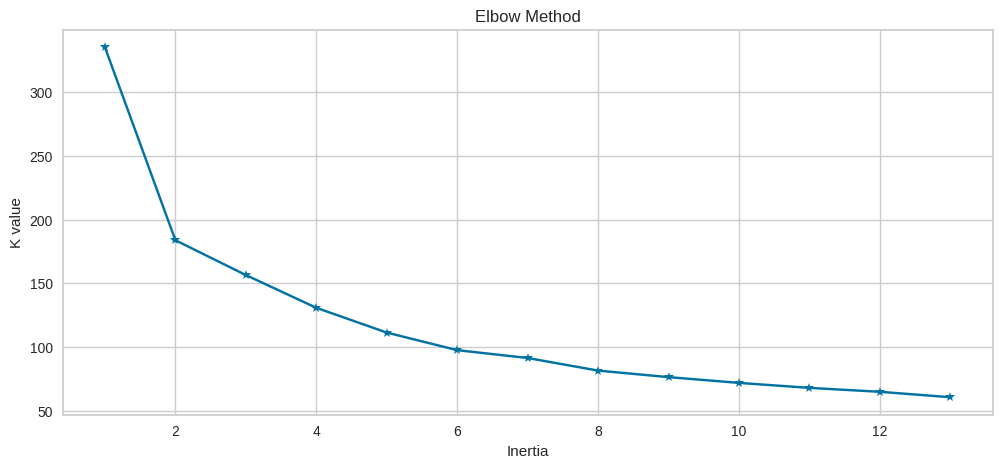

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(K_range, inertia, 'b*-')
plt.xlabel('Inertia')
plt.ylabel('K value')
plt.title('Elbow Method')

plt.savefig("elbow_method.png", dpi=300, bbox_inches='tight')
plt.show()

## Silhouette method to confirm K

Silhouette score for K= 2: 0.3962955751655992
Silhouette score for K= 3: 0.31309307729455566
Silhouette score for K= 4: 0.29659803763709186
Silhouette score for K= 5: 0.2868797455659297
Silhouette score for K= 6: 0.3012133472967153
Silhouette score for K= 7: 0.29521141968178943
Silhouette score for K= 8: 0.2692992832333203
Silhouette score for K= 9: 0.2568657781493703
Silhouette score for K= 10: 0.2543956225552309
Silhouette score for K= 11: 0.2647737961642862
Silhouette score for K= 12: 0.26468329452302003
Silhouette score for K= 13: 0.27544446214603335


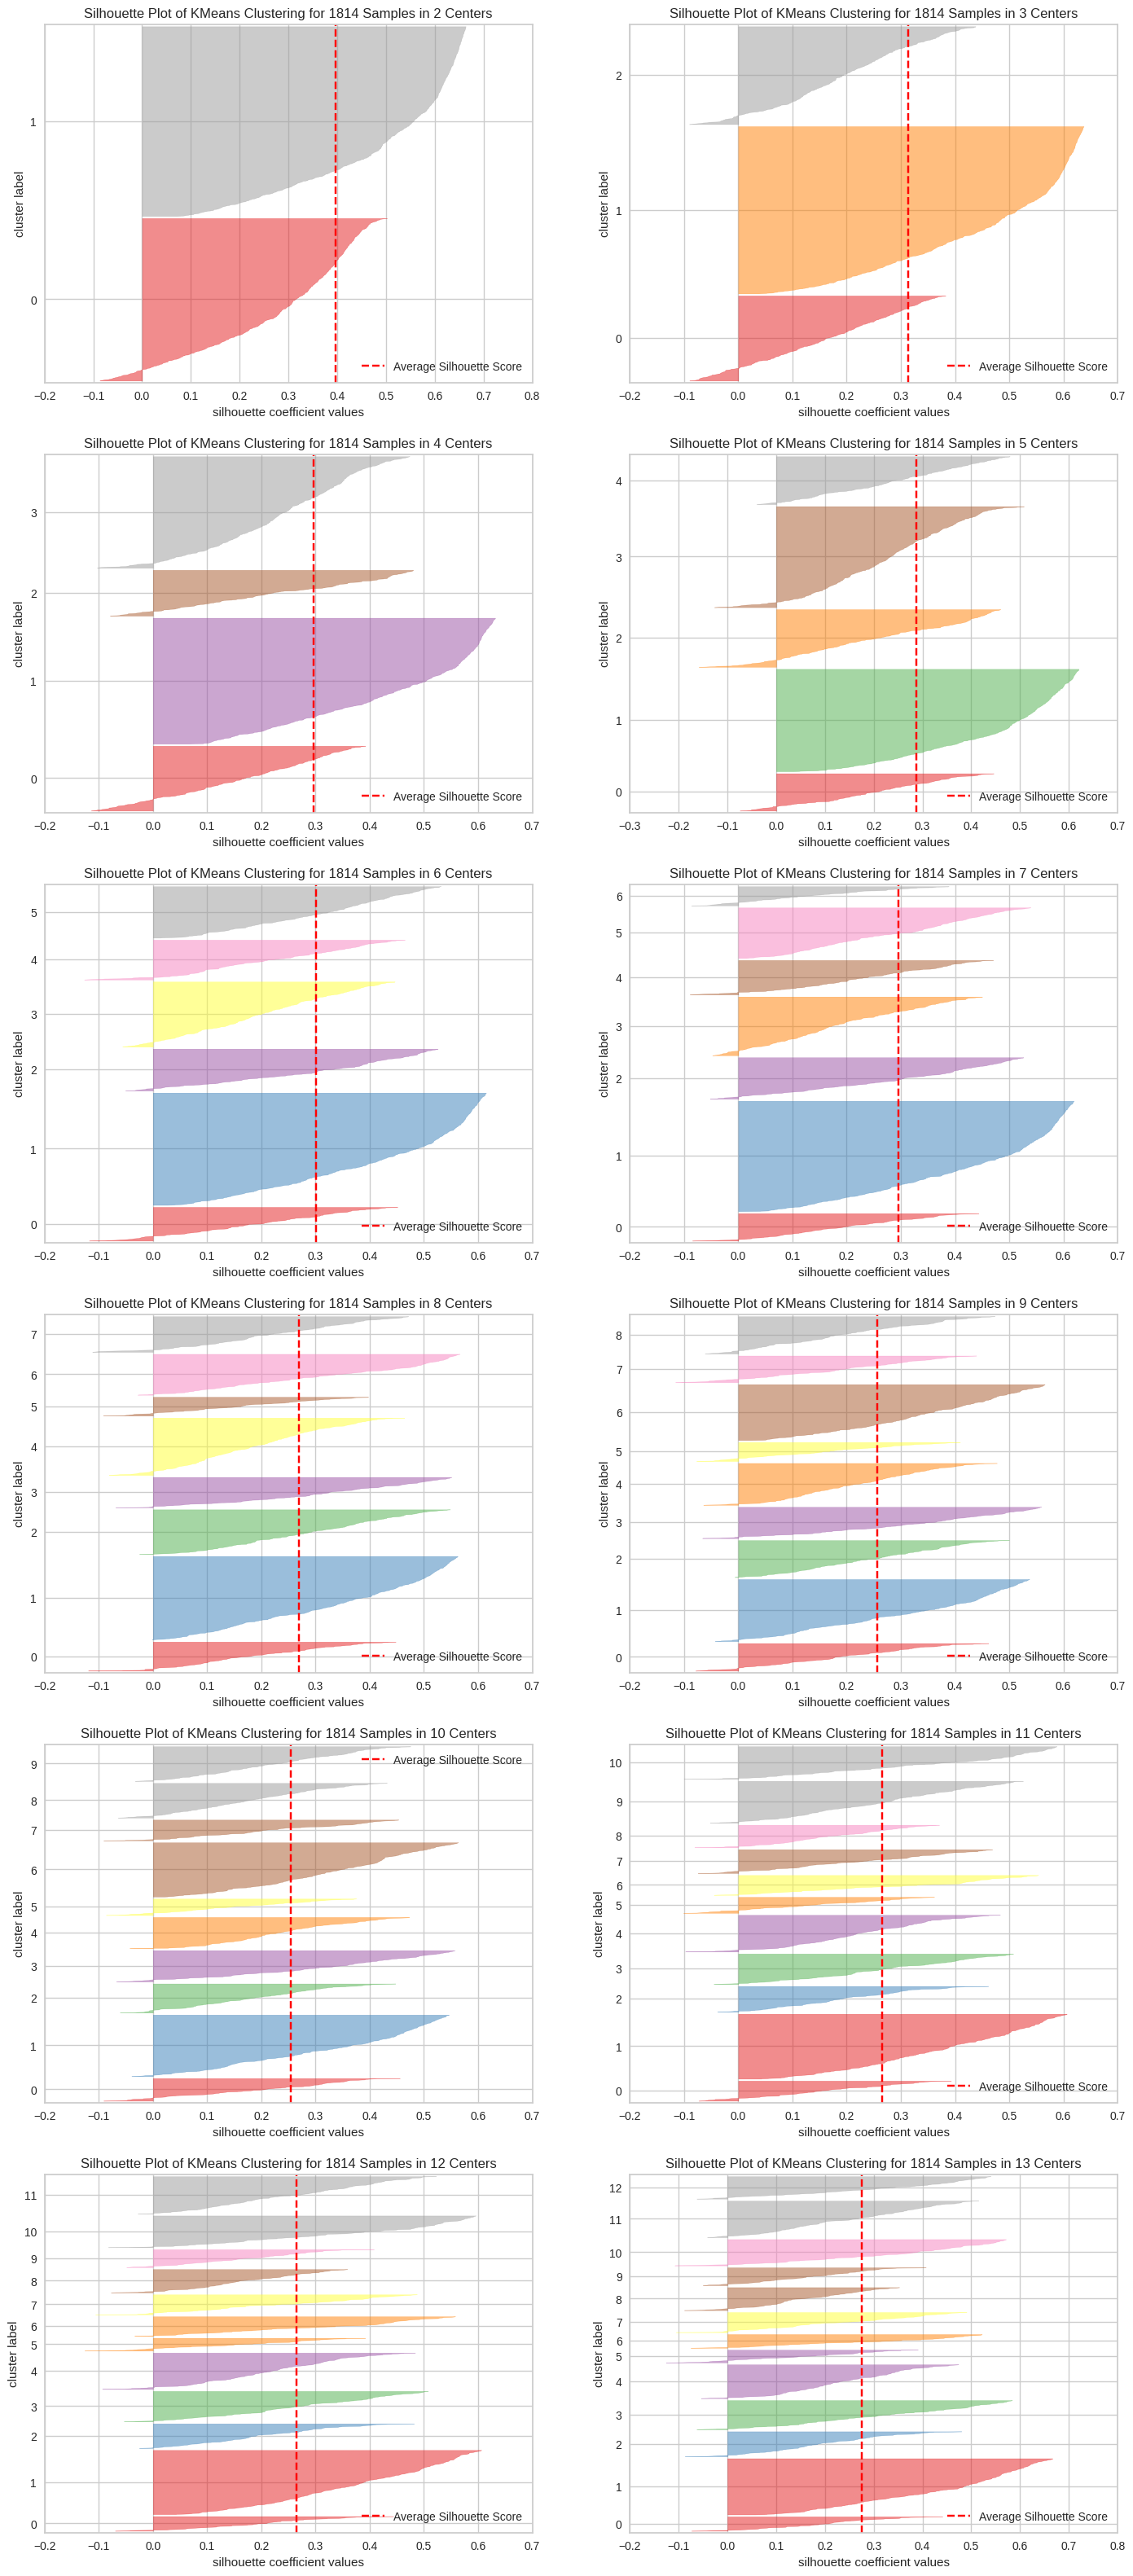

In [ ]:
k_rangesil = range(2, 14)

k_amount = len(k_rangesil)
n_row = int(np.ceil(k_amount/2))

fig, axes = plt.subplots(n_row, 2, figsize=(17,40))

for index, k in enumerate(k_rangesil):
  kmodel = KMeans(n_clusters=k, random_state=30, n_init='auto')

  sil = SilhouetteVisualizer(kmodel, is_fitted=False, ax=axes.flatten()[index])
  sil.fit(df_model)
  sil.finalize()

  print(f"Silhouette score for K= {k}: {sil.silhouette_score_}")

## Training the model

In [ ]:
cluster_model = KMeans(n_clusters=3, random_state=30, n_init='auto')

cluster_model.fit(df_model)

KMeans(n_clusters=3, random_state=30)

In [ ]:
cluster_model.labels_

array([0, 2, 1, ..., 0, 1, 2], dtype=int32)

In [ ]:
df_finalcluster = user_merged.copy()

df_finalcluster['Cluster'] =  cluster_model.labels_

df_finalcluster.head()

amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M   credit_limit  DTI  \
client_id                                                                     
0                535,262,100.00                  685.00 165,775,000.00 0.12   
1                264,007,900.00                  498.00  65,592,000.00 0.06   
10                         0.00                    0.00 108,249,000.00 0.30   
1000                       0.00                    0.00  36,225,000.00 0.32   
1001                       0.00                    0.00  13,926,000.00 0.32   

           Cluster  
client_id           
0                0  
1                2  
10               1  
1000             1  
1001             1

In [ ]:
df_finalcluster['Cluster'].value_counts()

Cluster
1    866
2    507
0    441
Name: count, dtype: int64

In [ ]:
df_finalcluster.shape

(1814, 5)

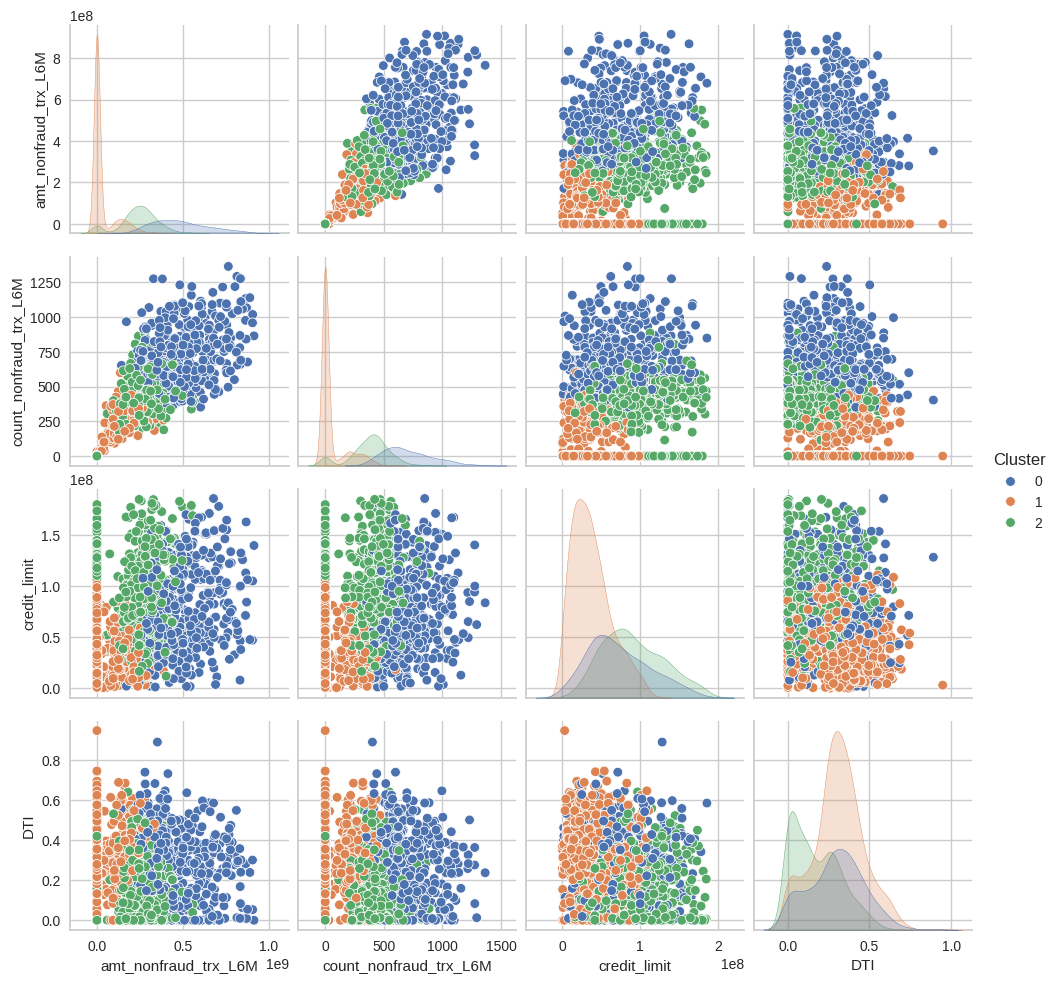

In [ ]:
sns.pairplot(df_finalcluster, hue='Cluster', palette='deep')

## Visualization with box plot

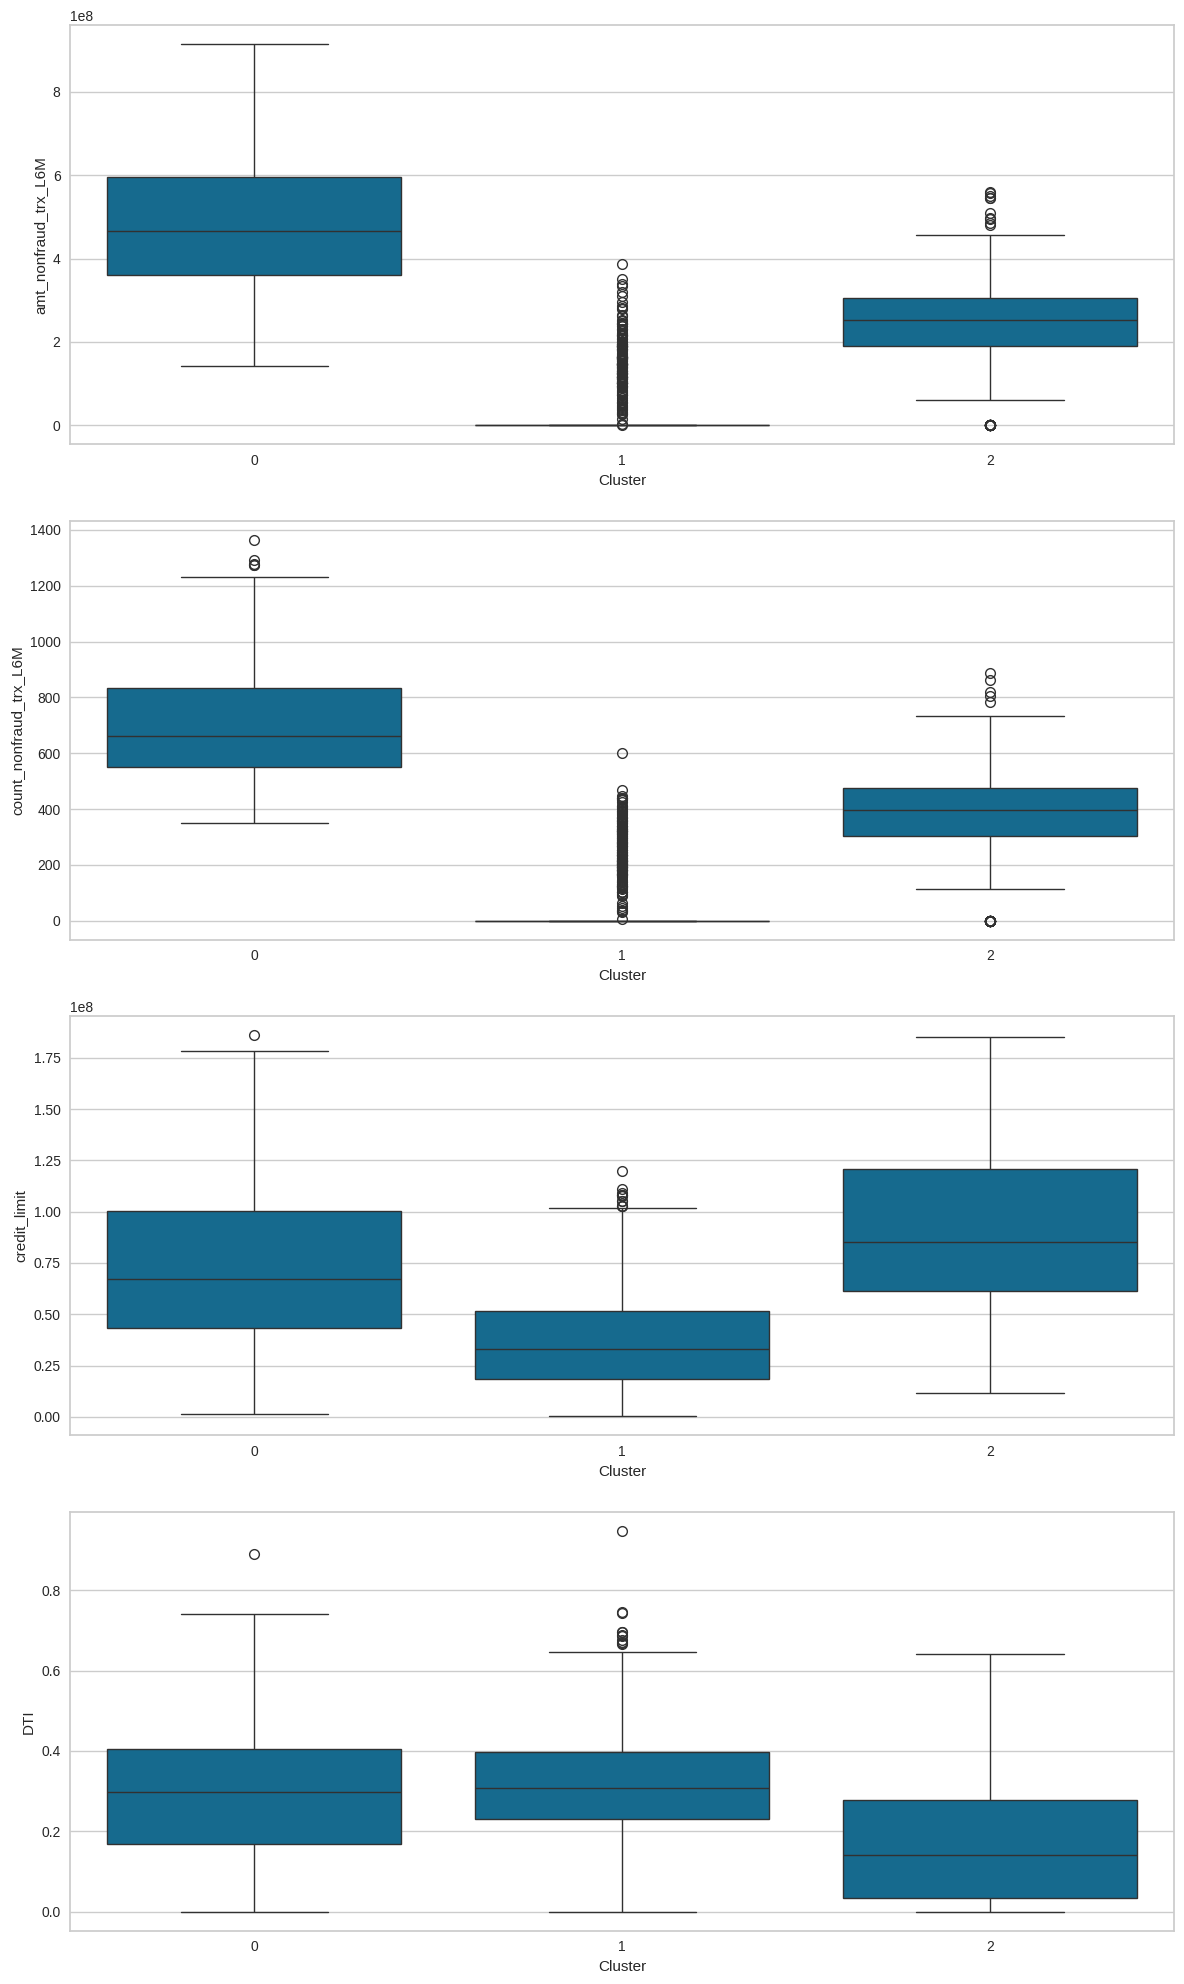

In [ ]:
n_row = user_merged.shape[1]

fig, axes = plt.subplots(n_row, 1, figsize=(12, 20))

for i, col in enumerate(user_merged.columns):
  sns.boxplot(df_finalcluster, x='Cluster', y=col, ax=axes.flatten()[i])

plt.tight_layout()

plt.savefig("clusters.png", dpi=300, bbox_inches='tight')
plt.show()

## Interpretation

In [ ]:
df4 = df_clean.copy().reset_index()

df4['cluster'] = cluster_model.labels_

df4.head()

client_id  amt_nonfraud_trx_L6M  count_nonfraud_trx_L6M   credit_limit  DTI  \
0         0        535,262,100.00                     685 165,775,000.00 0.12   
1         1        264,007,900.00                     498  65,592,000.00 0.06   
2        10                  0.00                       0 108,249,000.00 0.30   
3      1000                  0.00                       0  36,225,000.00 0.32   
4      1001                  0.00                       0  13,926,000.00 0.32   

   days_since_last_trx   age retirement_flag  cluster  
0                    3 33.00     Working_age        0  
1                   20 43.00     Working_age        2  
2                  604 29.00     Working_age        1  
3                  604 20.00     Working_age        1  
4                  604 20.00     Working_age        1

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               1814 non-null   object 
 1   amt_nonfraud_trx_L6M    1814 non-null   float64
 2   count_nonfraud_trx_L6M  1814 non-null   Int64  
 3   credit_limit            1814 non-null   float64
 4   DTI                     1814 non-null   float64
 5   days_since_last_trx     1814 non-null   int64  
 6   age                     1814 non-null   float64
 7   retirement_flag         1814 non-null   object 
 8   cluster                 1814 non-null   int32  
dtypes: Int64(1), float64(4), int32(1), int64(1), object(2)
memory usage: 122.4+ KB


In [ ]:
df4['cluster'] = df4['cluster'].astype(str)

In [ ]:
avg_last_trx = df4.groupby('cluster')['days_since_last_trx'].mean().sort_values(ascending=False).reset_index()

avg_last_trx

cluster  days_since_last_trx
0       1               480.99
1       2                67.33
2       0                 8.58

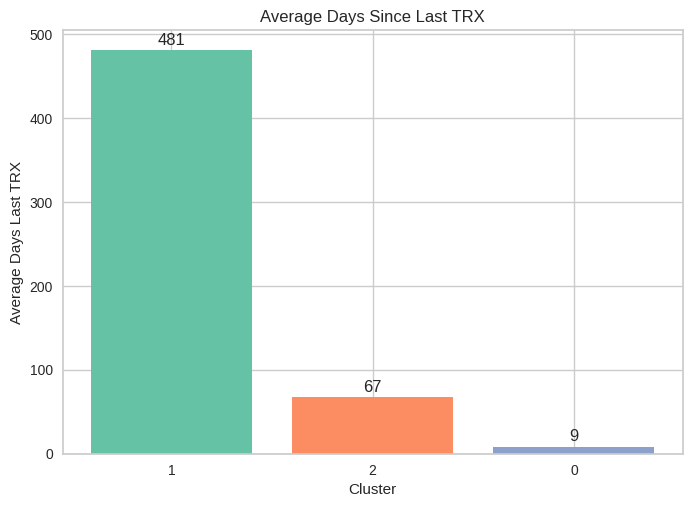

In [ ]:
colors = plt.cm.Set2(range(len(avg_last_trx)))

plt.bar(avg_last_trx['cluster'], avg_last_trx['days_since_last_trx'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Average Days Last TRX')
plt.title('Average Days Since Last TRX')
plt.bar_label(plt.gca().containers[0], labels=[f"{v:,.0f}" for v in avg_last_trx['days_since_last_trx']], padding=2)

plt.savefig("day_l_trx.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
avg_age = df4.groupby('cluster')['age'].mean().sort_values(ascending=False).reset_index()

avg_age

cluster   age
0       2 54.77
1       0 50.93
2       1 35.69

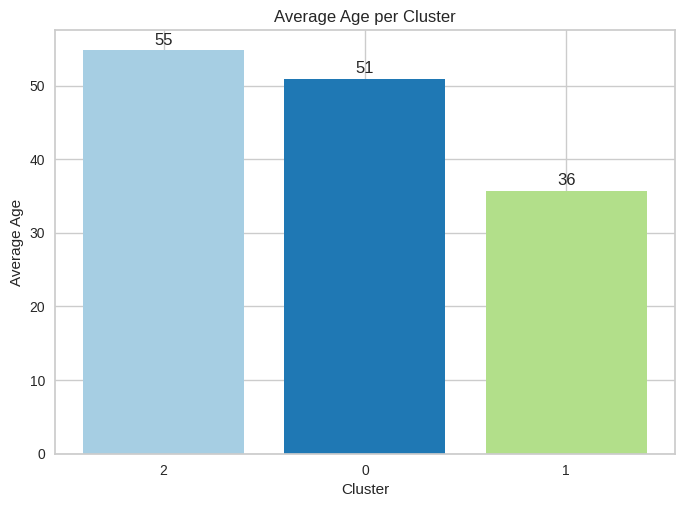

In [ ]:
colors2 = plt.cm.Paired(range(len(avg_age)))

plt.bar(avg_age['cluster'], avg_age['age'], color=colors2)
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.title('Average Age per Cluster')
plt.bar_label(plt.gca().containers[0], labels=[f"{v:,.0f}" for v in avg_age['age']], padding=2)

plt.savefig("avg_age.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
retirement_percluster = df4.groupby(['cluster','retirement_flag'])['client_id'].count().reset_index(name='number_of_users')

retirement_percluster

cluster retirement_flag  number_of_users
0        0         Retired               59
1        0     Working_age              382
2        1         Retired               48
3        1     Working_age              818
4        2         Retired              147
5        2     Working_age              360

In [ ]:
pivot = retirement_percluster.pivot(index='cluster', columns='retirement_flag', values='number_of_users')

pivot

retirement_flag  Retired  Working_age
cluster                              
0                     59          382
1                     48          818
2                    147          360

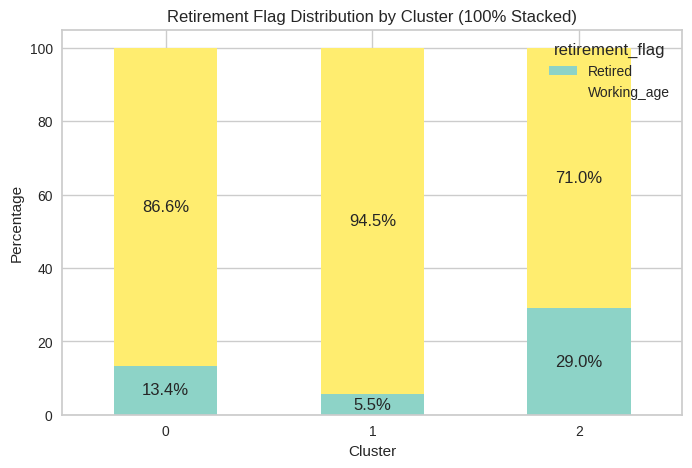

In [ ]:
# Normalize each row to percentages
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

ax = pivot_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5),
    colormap="Set3"
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Retirement Flag Distribution by Cluster (100% Stacked)")
plt.xlabel("Cluster")
plt.ylabel("Percentage")
plt.xticks(rotation=0)

plt.savefig("retirement_flag.png", dpi=300, bbox_inches='tight')
plt.show()